In [1]:
import uproot as ur
import zfit
from zfit import z
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from HighLenin.python.getPreselection import *
import pandas as pd
from matplotlib import pylab
from HighLenin.python.utils.plotFunctions import *
import mplhep
mplhep.set_style('LHCb2')

In [2]:
branches = branches = [
            "nSPDHits",
            "e_plus_PIDe",
            "e_minus_PIDe",
            "e_plus_P",
            "e_minus_P",
            "e_plus_PT",
            "e_minus_PT",
            "e_plus_IPCHI2_OWNPV",
            "e_minus_IPCHI2_OWNPV",
            "J_psi_1S_M",
            "B_plus_M",
            "B_plus_DTFM_M",
            "K_Kst_MC15TuneV1_ProbNNk",
            "K_Kst_PIDK",
            "K_Kst_TRACK_GhostProb",
            "e_plus_TRACK_GhostProb",
            "e_minus_TRACK_GhostProb",
            "e_plus_hasRich",
            "e_plus_hasCalo",
            "e_minus_hasRich",
            "e_minus_hasCalo",
            # "dataCondSPDWeight",
            "K_Kst_P",
            "K_Kst_PE",
            # "poissonWeight",
            # "nPoissonWeights",
            "e_minus_PT",
            "e_minus_P",
            "e_plus_PT",
            "e_plus_P",
            "*HasBremAdded*",
            "L0Data_Muon1_Pt",
            "Polarity",
            "*_TRACK_PT",
            "passTrigCat*",
            "J_psi_1S_TRACK_M",
            "*hasRich*",
            "*L0Calo_ECAL_*Projection",
            "*DLL*",
            "K_Kst_PIDe",
            "Kemu_MKl",
            "Kemu_TRACK_MKl_l2pi",
            "Kemu_TRACK_MKl_l2pi",
            "Kemu_MKl_l2pi",
            "B_plus_M02",
            "BDT*",
            "KinWeight*"
            ]




In [3]:
year=2018
PATH_MC='/disk/lhcb_data/davide/RKHighq2/tuples/'+str(year)+'/MC/KeeTuples/HltTOS/'
PATH_Data='/disk/lhcb_data/davide/RKHighq2/tuples/'+str(year)+'/data/KeeTuples/HltTOS/'


preselStringNoPid=getCommonPreselNoPidCutRun2().replace('&&',' and ').replace('TMath::Abs','abs').replace('||',' or ')
preselString=getCommonPreselRun2().replace('&&',' and ').replace('TMath::Abs','abs').replace('||',' or ')
preselString=preselString.replace('e_minus_PIDe>3','e_minus_PIDe>4').replace('e_plus_PIDe>3','e_plus_PIDe>4')



In [4]:
def prepareMCWorkspace():
    
    fileMC = ur.open(PATH_MC+tupleMCName)
    

In [5]:
tupleMCName='Kee_'+str(year)+'_CommonPresel_HltTOS_bdt.root'
fileMC = ur.open(PATH_MC+tupleMCName)
treeMC=fileMC['DecayTree']

branchesMC=treeMC.arrays(library='pd', filter_name=branches)
branchesMC*=1.
df_CommonPresel=branchesMC.query(preselStringNoPid);


In [63]:
len(branchesMC)

259497

In [6]:
df_trig0 = df_CommonPresel.query("J_psi_1S_TRACK_M*J_psi_1S_TRACK_M > 14e6 and passTrigCat0 and B_plus_M>4980 and B_plus_M<6200")
df_t0ph0=df_trig0.query("(e_plus_HasBremAdded + e_minus_HasBremAdded) == 0")
df_t0ph1=df_trig0.query("(e_plus_HasBremAdded + e_minus_HasBremAdded) == 1")
df_t0ph2=df_trig0.query("(e_plus_HasBremAdded + e_minus_HasBremAdded) >= 2")

In [7]:
obs = zfit.Space('B_plus_M', (4980,6200))

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

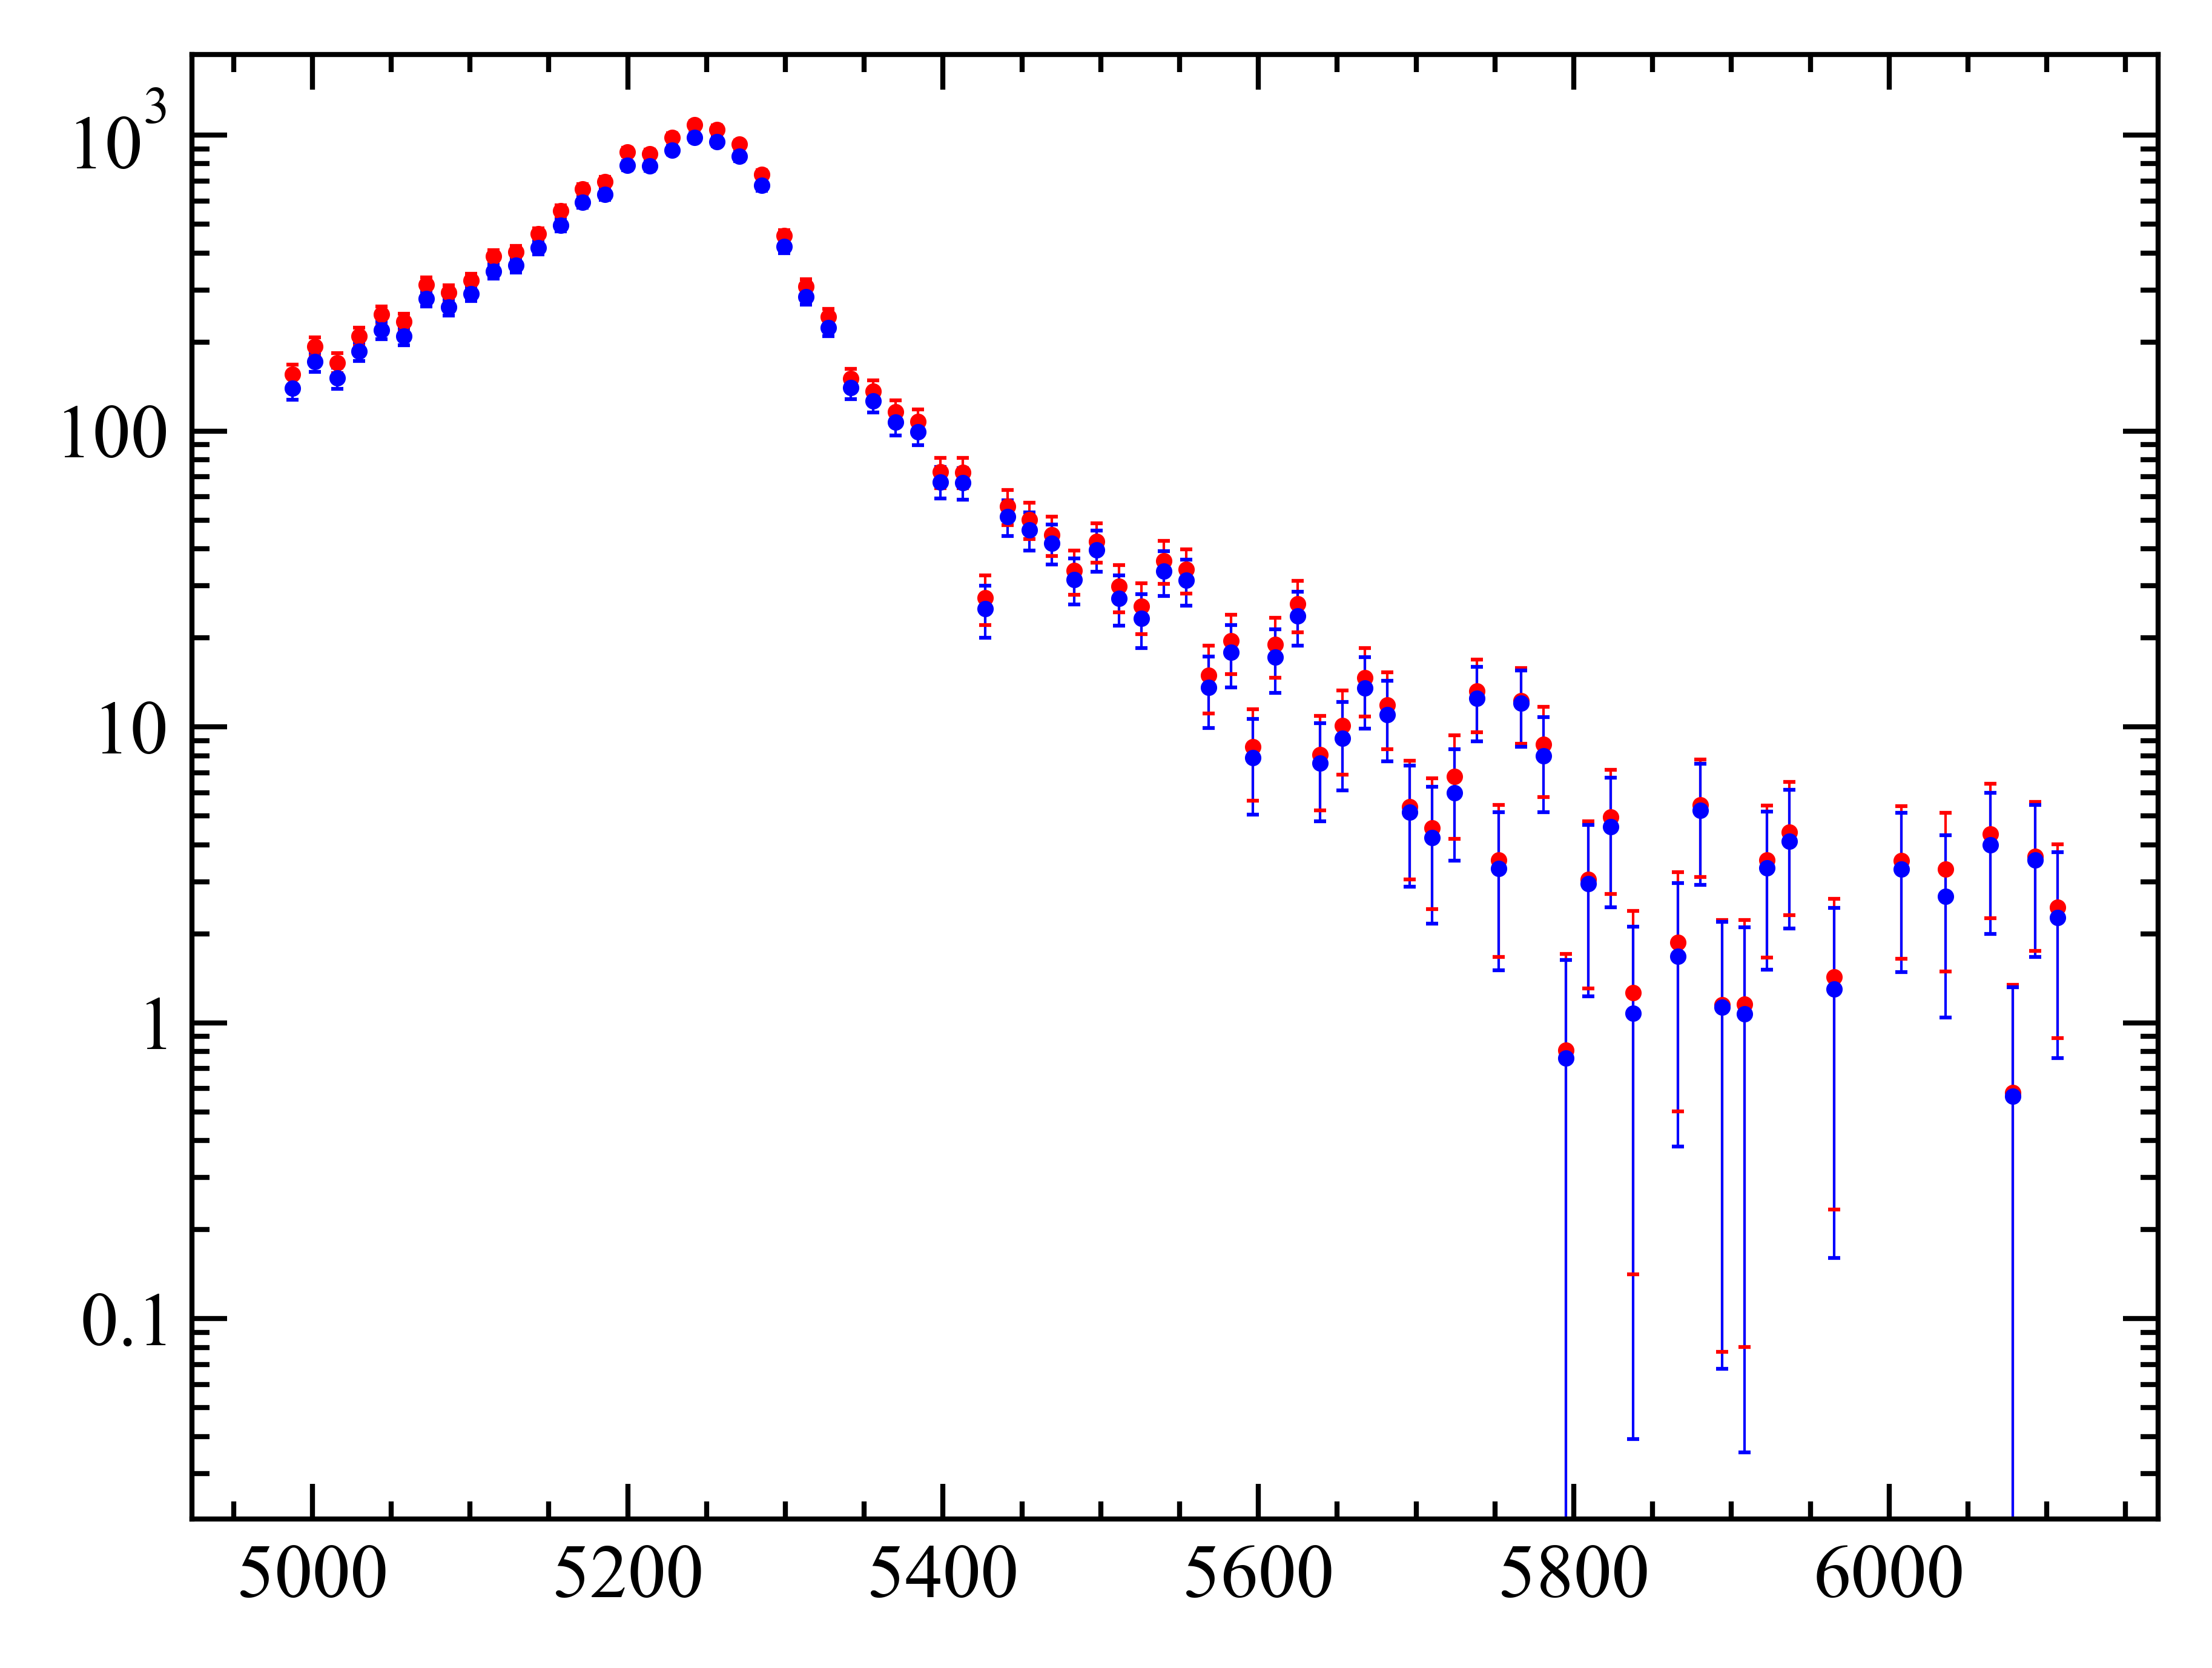

In [8]:
mplhep.histplot(plt.hist(df_trig0['B_plus_M'], weights=df_trig0['PIDWeight_DLL3']*df_trig0['KinWeight_MUTOS2DNTracks'], bins=80,log=True, facecolor="none"), 
                yerr=True, color='red', histtype='errorbar')
mplhep.histplot(plt.hist(df_trig0['B_plus_M'], weights=df_trig0['PIDWeight_DLL4']*df_trig0['KinWeight_MUTOS2DNTracks'], bins=80,log=True, facecolor="none"), 
                yerr=True, color='blue', histtype='errorbar')

In [57]:
f0g_Mu=len(df_t0ph0)/len(df_trig0)
f0g_Sigma=0.01*f0g_Mu

f1g_Mu=len(df_t0ph1)/len(df_trig0)
f1g_Sigma=0.01*f1g_Mu


In [64]:
f0g_Mu

0.4855258336386955

In [10]:
B_plus_M0 = zfit.Data.from_numpy(obs=obs, weights=df_t0ph0['PIDWeight_DLL4']*df_t0ph0['KinWeight_MUTOS2DNTracks'], array=df_t0ph0['B_plus_M'].to_numpy())
B_plus_M1 = zfit.Data.from_numpy(obs=obs, weights=df_t0ph1['PIDWeight_DLL4']*df_t0ph1['KinWeight_MUTOS2DNTracks'], array=df_t0ph1['B_plus_M'].to_numpy())
B_plus_M2 = zfit.Data.from_numpy(obs=obs, weights=df_t0ph2['PIDWeight_DLL4']*df_t0ph2['KinWeight_MUTOS2DNTracks'], array=df_t0ph2['B_plus_M'].to_numpy())
B_plus_M = zfit.Data.from_numpy(obs=obs, weights=df_trig0['PIDWeight_DLL4']*df_trig0['KinWeight_MUTOS2DNTracks'], array=df_trig0['B_plus_M'].to_numpy())


In [11]:
#frac0gamma = zfit.Parameter("frac0gamma", f0g_Mu, f0g_Mu-f0g_Sigma,f0g_Mu+f0g_Sigma)
frac0gamma = zfit.Parameter("frac0gamma", f0g_Mu, floating=False)
#frac1gamma = zfit.Parameter("frac1gamma", f1g_Mu, f1g_Mu-f1g_Sigma,f1g_Mu+f1g_Sigma)
frac1gamma = zfit.Parameter("frac1gamma", f1g_Mu, floating=False)

In [12]:
frac0gammaConstraint = zfit.constraint.GaussianConstraint(frac0gamma, observation=f0g_Mu , uncertainty=f0g_Sigma )
frac1gammaConstraint = zfit.constraint.GaussianConstraint(frac1gamma, observation=f1g_Mu , uncertainty=f1g_Sigma )



In [13]:
nPhotons=0
mean0 = zfit.Parameter("mean"+str(nPhotons), 5280, 5000, 5500)
sigma0 = zfit.Parameter("sigma"+str(nPhotons), 25, 7, 50)
sigma20 = zfit.Parameter("sigma2"+str(nPhotons), 50, 7, 200)

alpha_left0 = zfit.Parameter("alpha_right_"+str(nPhotons), .1, .01, 2)
alpha_right0 = zfit.Parameter("alpha_left_"+str(nPhotons), -.1, -2, -.01)
n_left0 = zfit.Parameter("n_left_"+str(nPhotons), 2, 7, 20)
n_right0 = zfit.Parameter("n_right_"+str(nPhotons), 2, 7, 20)

nPhotons=1
mean1 = zfit.Parameter("mean"+str(nPhotons), 5280, 5000, 5500)
sigma1 = zfit.Parameter("sigma"+str(nPhotons), 30, 7, 50)
sigma21 = zfit.Parameter("sigma2"+str(nPhotons), 50, 7, 100)


alpha_left1 = zfit.Parameter("alpha_right_"+str(nPhotons), .1, .001, 2)
alpha_right1 = zfit.Parameter("alpha_left_"+str(nPhotons), -.1, -2, -.001)
n_left1 = zfit.Parameter("n_left_"+str(nPhotons), 2, 7, 25)
n_right1 = zfit.Parameter("n_right_"+str(nPhotons), 2, 7, 25)


sigma31 = zfit.Parameter("sigmaGaus3"+str(nPhotons),100, 10 , 2000)
fracGaus1 = zfit.Parameter("fracGaus"+str(nPhotons), 0.50, 0.0001, 0.999)


nPhotons=2
mean2 = zfit.Parameter("mean"+str(nPhotons), 5280, 5000, 5500)
sigma2 = zfit.Parameter("sigma"+str(nPhotons), 50, 7, 100)
sigma22 = zfit.Parameter("sigma2"+str(nPhotons), 50, 7, 100)

alpha_left2 = zfit.Parameter("alpha_right_"+str(nPhotons), .1, .001, 2)
alpha_right2 = zfit.Parameter("alpha_left_"+str(nPhotons), -.1, -2, -.001)
n_left2 = zfit.Parameter("n_left_"+str(nPhotons), 2, 7, 25)
n_right2 = zfit.Parameter("n_right_"+str(nPhotons), 2, 7, 25)

sigma32 = zfit.Parameter("sigmaGaus3"+str(nPhotons),100, 10 , 2000)
fracGaus2 = zfit.Parameter("fracGaus"+str(nPhotons), 0.50, 0.0001, 0.999)

In [14]:

nPhotons=0
fracCB0 = zfit.Parameter("fracCB"+str(nPhotons), 0.66, 0.00001, 0.99999)
cb10 = zfit.pdf.CrystalBall(obs=obs, mu=mean0, sigma=sigma0, alpha=alpha_left0, n=n_left0)
cb20 = zfit.pdf.CrystalBall(obs=obs, mu=mean0, sigma=sigma0, alpha=alpha_right0, n=n_right0)
sigModel0 = zfit.pdf.SumPDF([cb10, cb20], [fracCB0])


nPhotons=1
fracCB1 = zfit.Parameter("fracCB"+str(nPhotons), 0.66, 0.00001, 0.99999)
cb11 = zfit.pdf.CrystalBall(obs=obs, mu=mean1, sigma=sigma1, alpha=alpha_left1, n=n_left1)
cb21 = zfit.pdf.CrystalBall(obs=obs, mu=mean1, sigma=sigma1, alpha=alpha_right1, n=n_right1)
sigGaus1 = zfit.pdf.Gauss(obs=obs, mu=mean1, sigma=sigma31)

sigModelCB1 = zfit.pdf.SumPDF([cb11, cb21], [fracCB1])
sigModel1 = zfit.pdf.SumPDF([sigModelCB1,sigGaus1],[fracGaus1])


nPhotons=2
fracCB2 = zfit.Parameter("fracCB"+str(nPhotons), 0.66, 0.00001, 0.99999)
cb12 = zfit.pdf.CrystalBall(obs=obs, mu=mean2, sigma=sigma2, alpha=alpha_left2, n=n_left2)
cb22 = zfit.pdf.CrystalBall(obs=obs, mu=mean2, sigma=sigma2, alpha=alpha_right2, n=n_right2)
sigGaus2 = zfit.pdf.Gauss(obs=obs, mu=mean2, sigma=sigma32)

sigModelCB2 = zfit.pdf.SumPDF([cb12, cb22], [fracCB2])
sigModel2 = zfit.pdf.SumPDF([sigModelCB2,sigGaus2],[fracGaus2])





In [15]:
nll0 = zfit.loss.UnbinnedNLL(sigModel0, B_plus_M0)
nll1 = zfit.loss.UnbinnedNLL(sigModel1, B_plus_M1)
nll2 = zfit.loss.UnbinnedNLL(sigModel2, B_plus_M2)

In [16]:
minimizer = zfit.minimize.Minuit(use_minuit_grad=True, minimize_strategy=2, verbosity=6)

In [17]:
result0 = minimizer.minimize(nll0)
result1 = minimizer.minimize(nll1)
result2 = minimizer.minimize(nll2)

/disk/lhcb_data/davide/miniconda3/envs/zfit_env/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


W MnPosDef Matrix forced pos-def by adding to diagonal 0.327398
W VariableMetricBuilder No improvement in line search
W MnPosDef Matrix forced pos-def by adding to diagonal 2.36834
W MnPosDef Matrix forced pos-def by adding to diagonal 0.668279
W MnPosDef Matrix forced pos-def by adding to diagonal 0.32653
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def., try to make pos.def.
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0285583
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0981138
W MnPosDef Matrix forced pos-def by adding to diagonal 0.400156
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def., try to make pos.def.
W MnPosDef Matrix forced pos-def by adding to diagonal 7.49055


In [18]:
result0, result1, result2

(FitResult of
<UnbinnedNLL model=[<zfit.SumPDF  params=[Composed_autoparam_0, fracCB0] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7f8e25863430>] constraints=[]> 
with
<Minuit strategy=PushbackStrategy tolerance=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ False   │ True        │ True             │ 5.2e-05 │ 3.336e+04   │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name             value    at limit
-------------  -------  ----------
fracCB0              1        True
alpha_right_0   0.1788       False
mean0             5249       False
n_left_0         19.99       False
sigma0           25.08       False
alpha_left_0     -1.98       False
n_right_0        18.89       False,
 FitResult of
<UnbinnedNLL model=[<zfit.SumPDF  params=[Composed_autoparam_2, fracGaus1] dtype=

/home/hep/davide/RKHighq2/HighLenin/python/utils/plotFunctions.py:27: UserWarning: The function <function Space.limit1d at 0x7f8f3f791f70> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('B_plus_M',), axes=(0,), limits=(array([[4980.]]), array([[6200.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  lower, upper = data.data_range.limit1d


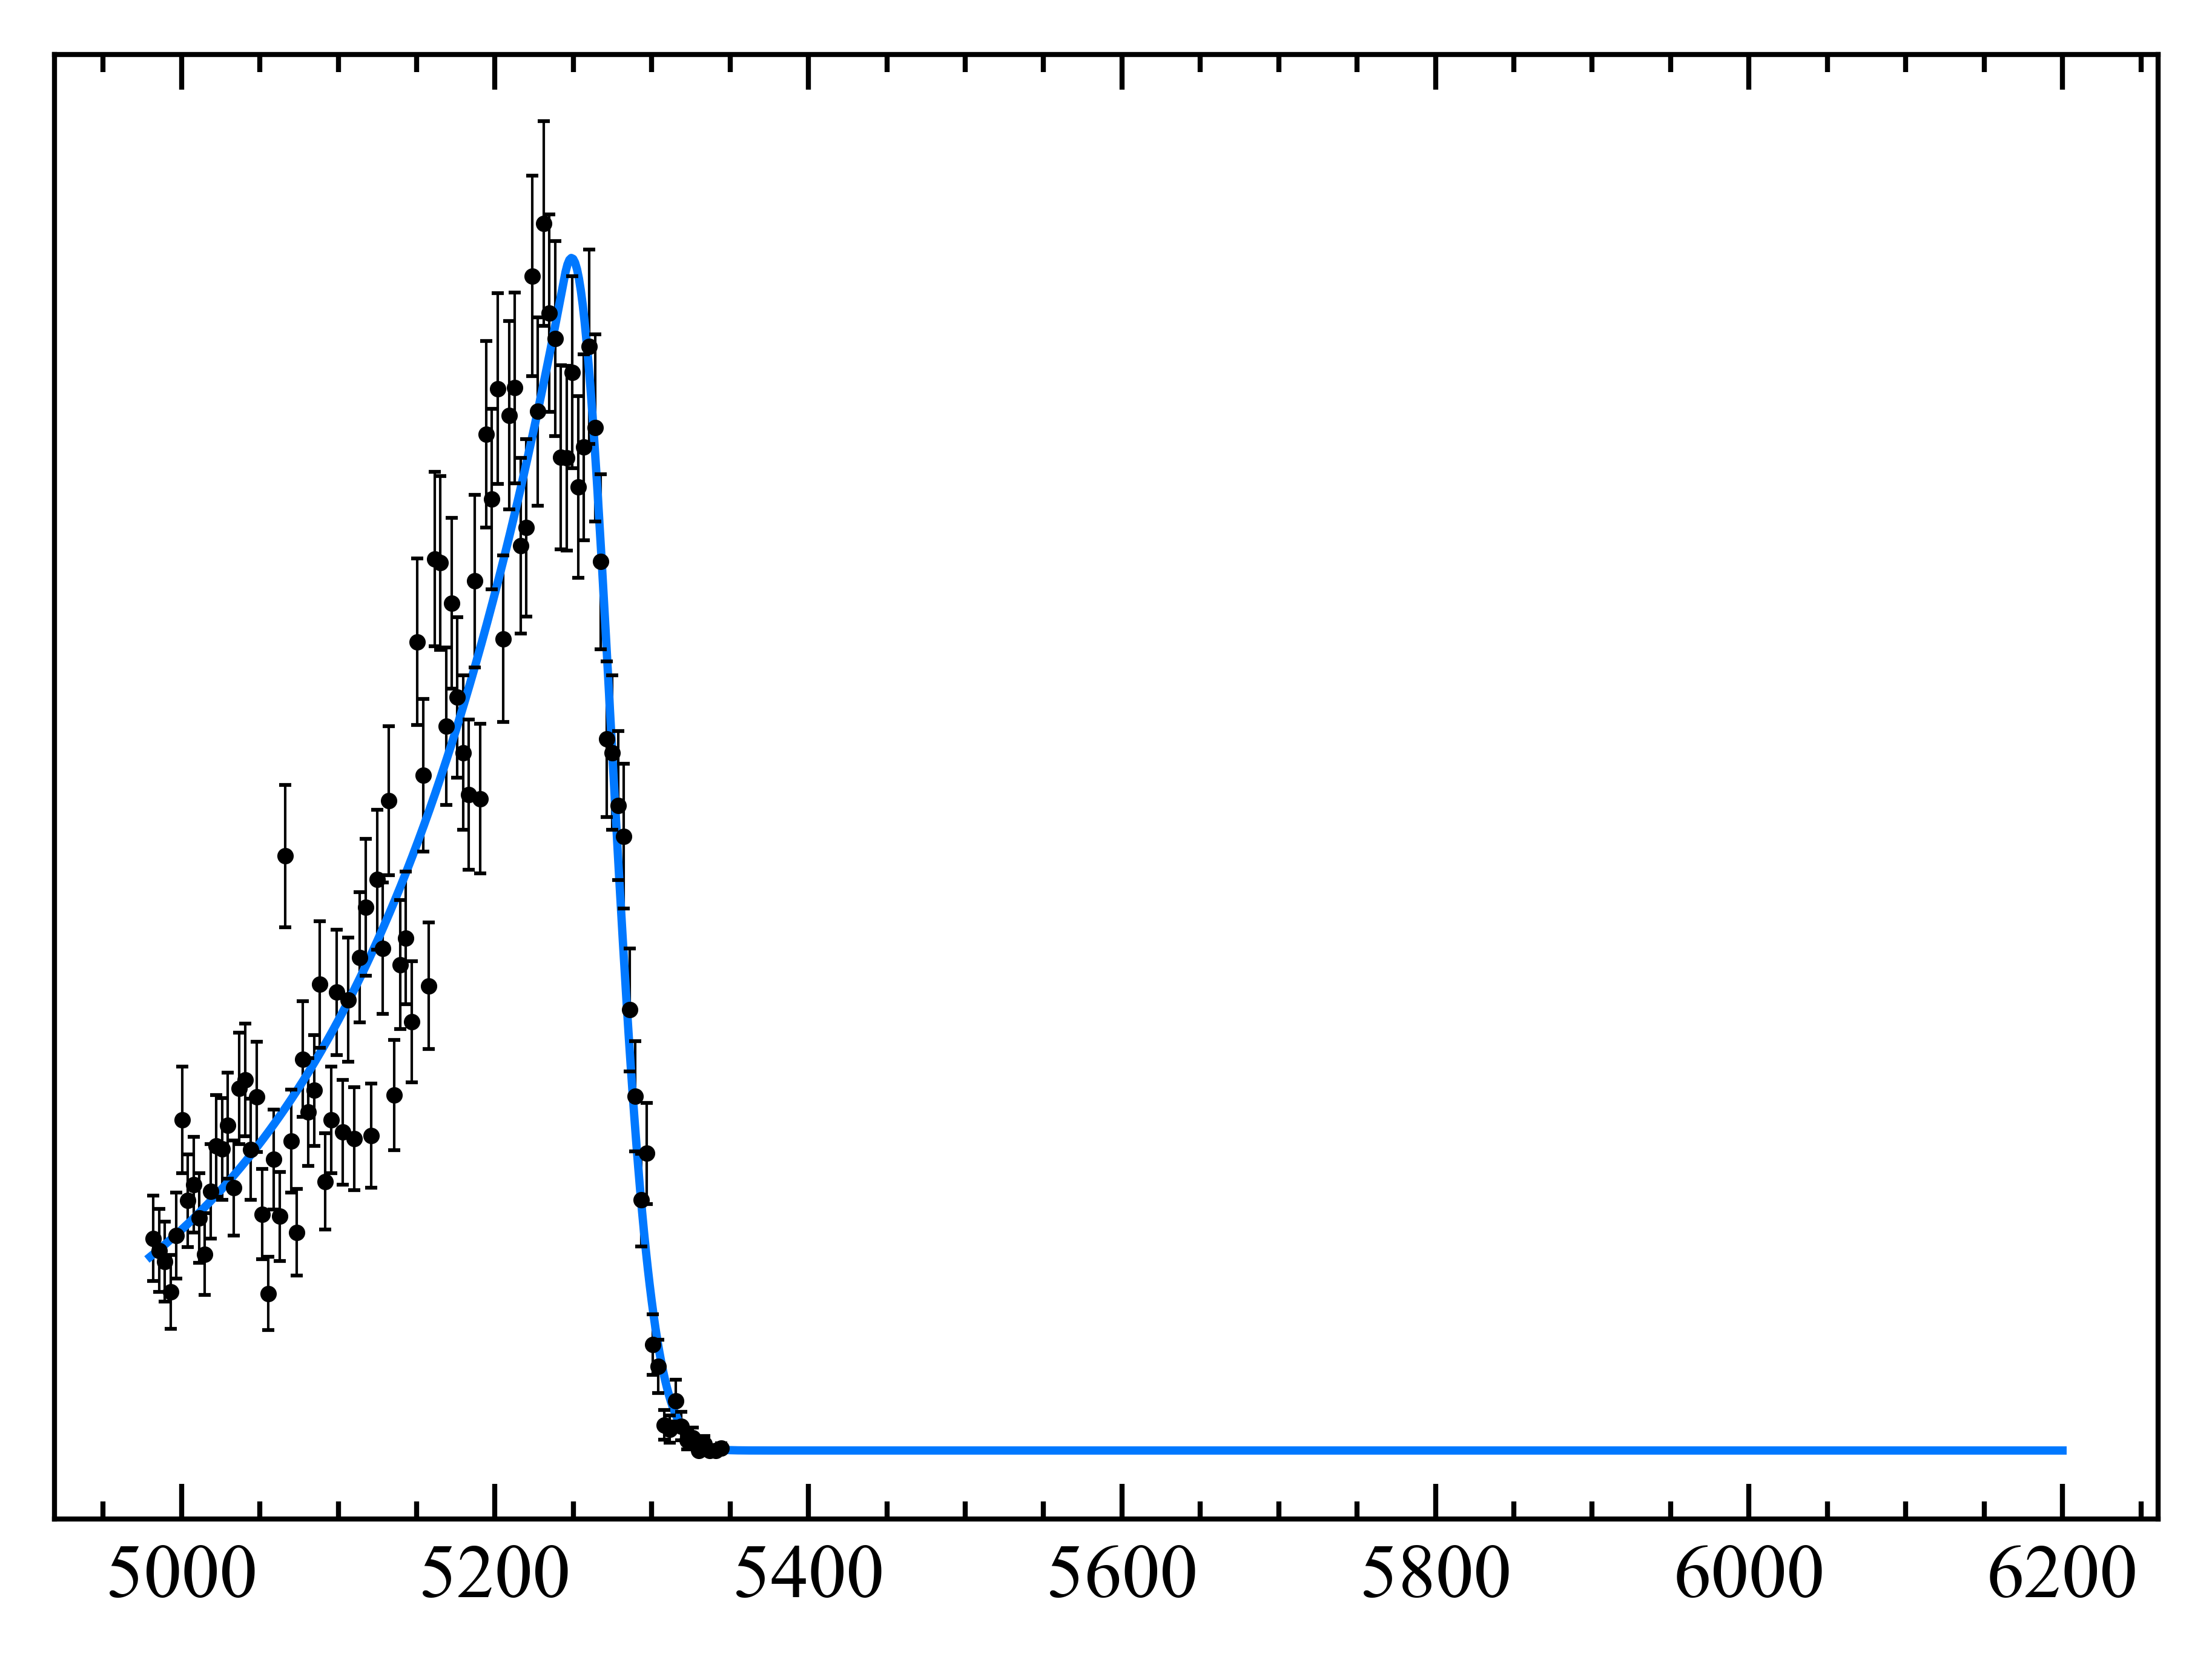

In [19]:
plot_model(cb10,B_plus_M0)

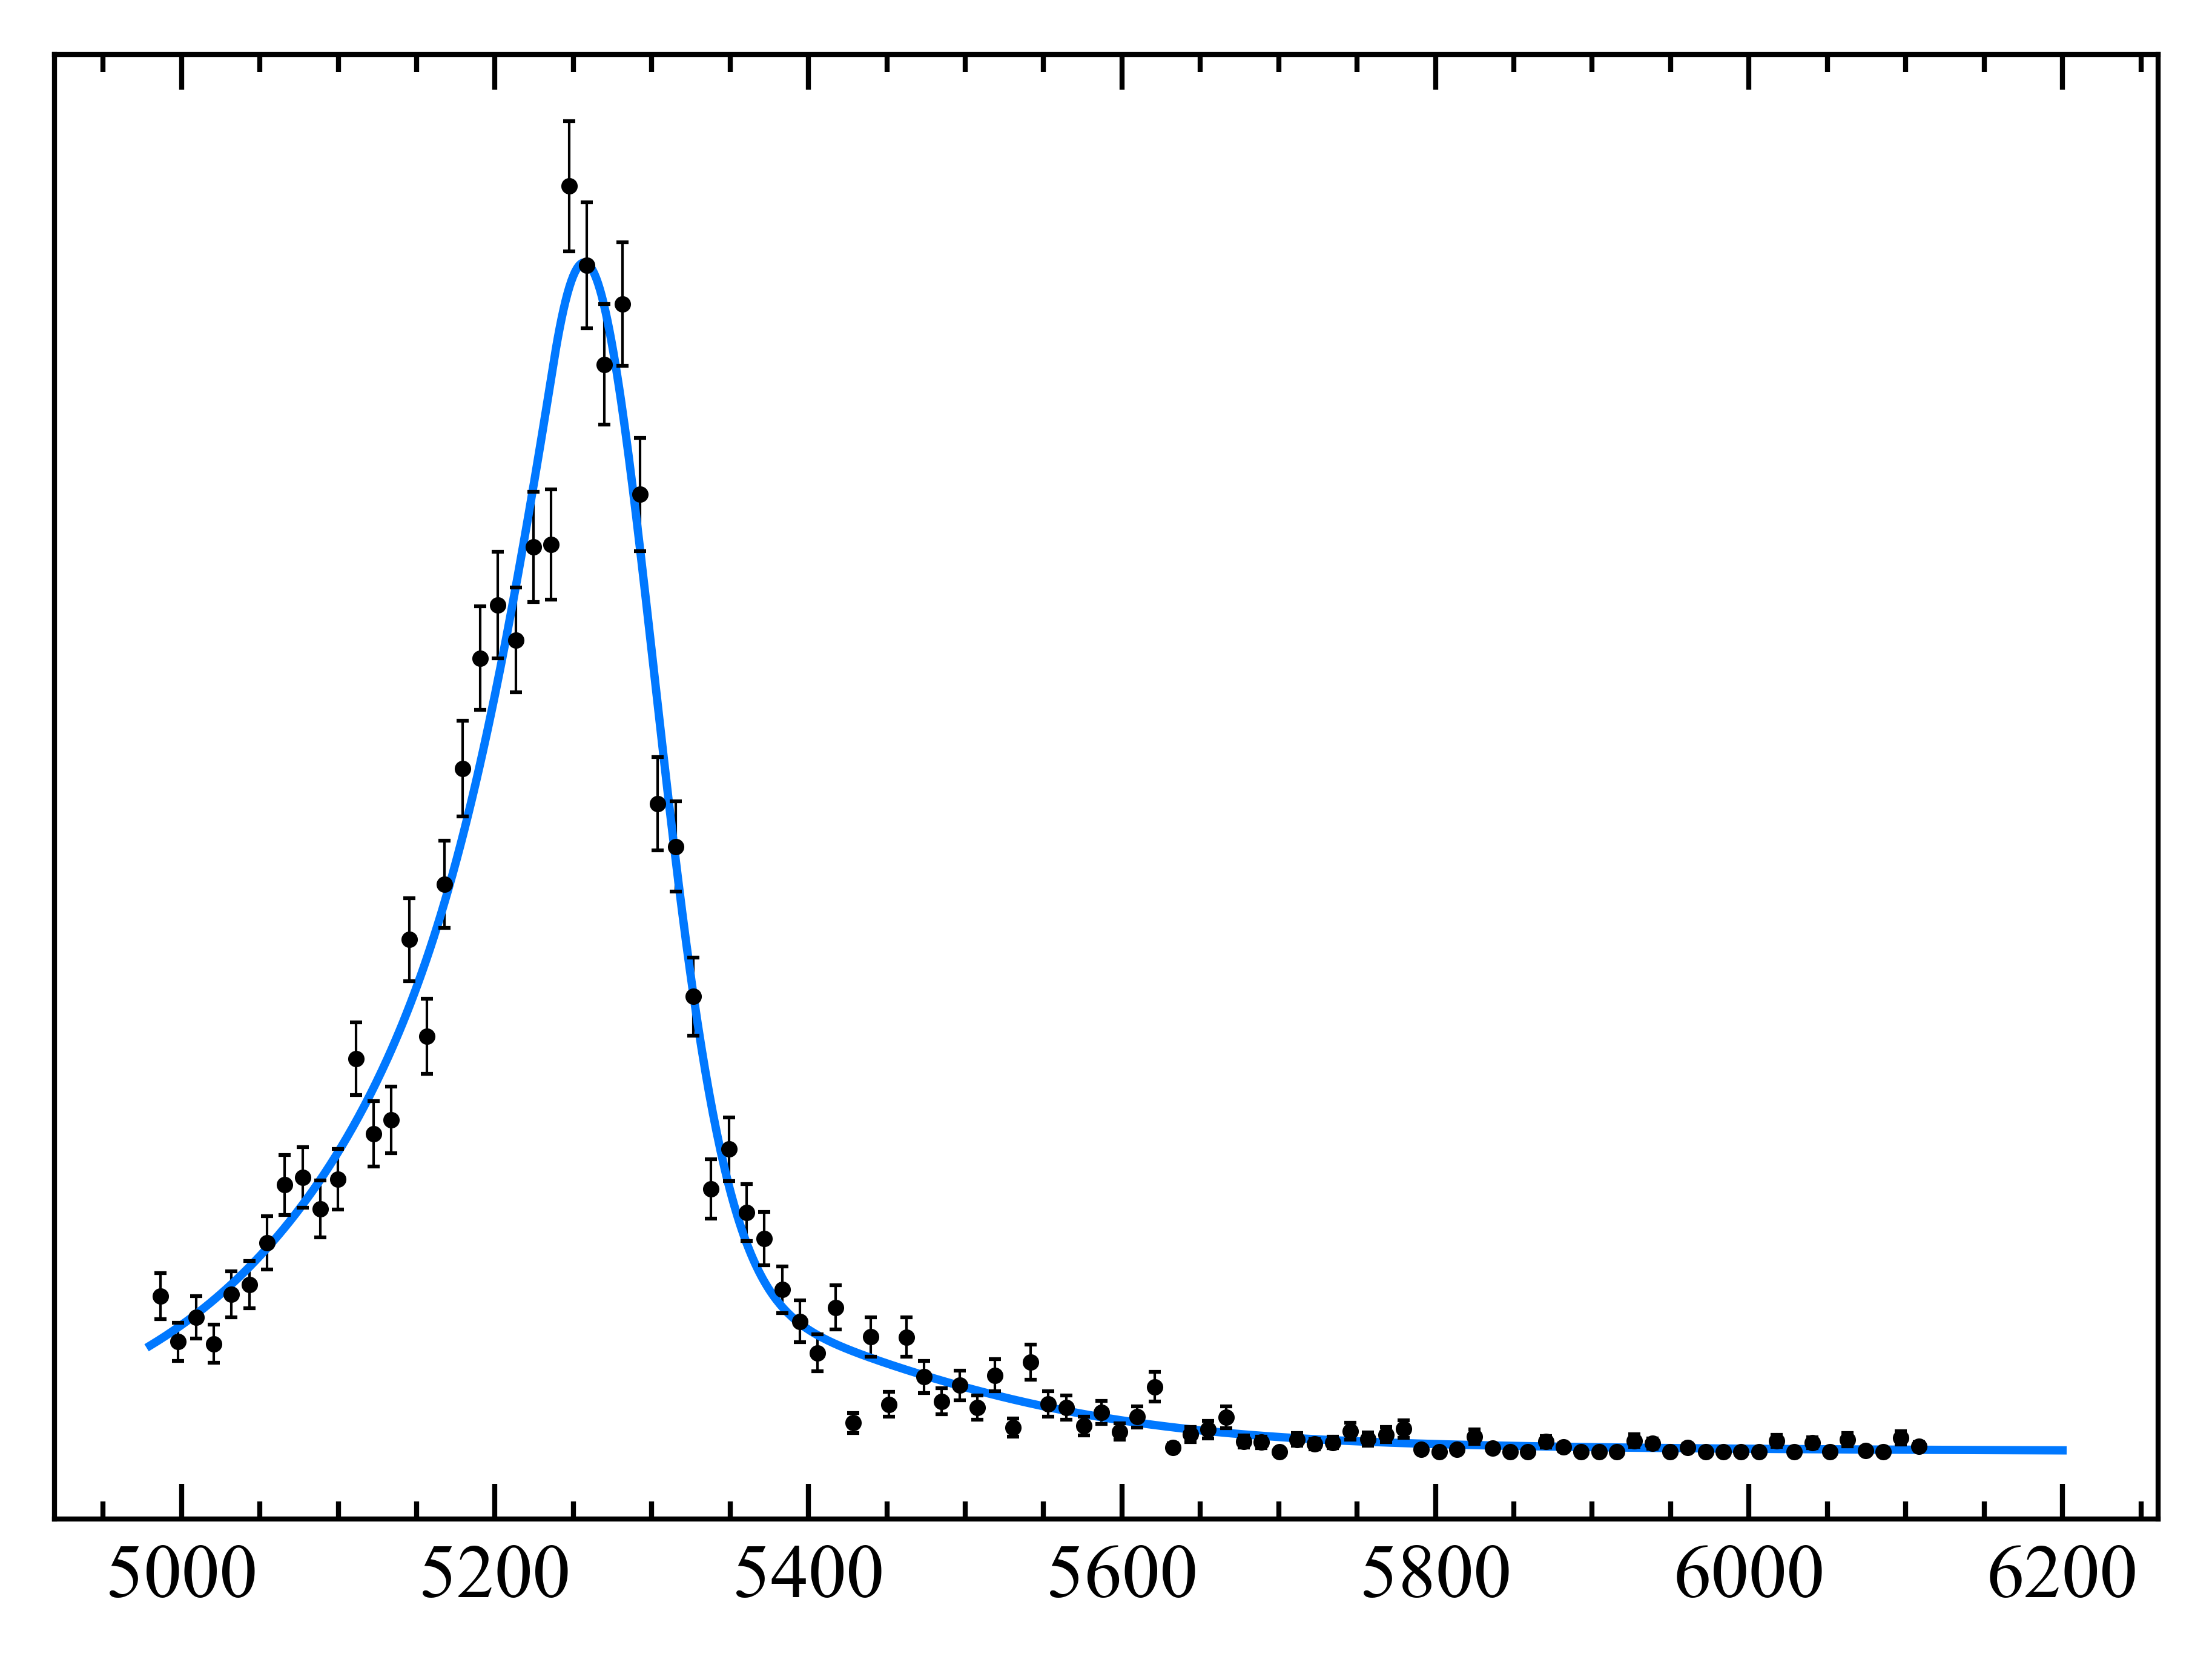

In [20]:
plot_model(sigModel1,B_plus_M1)

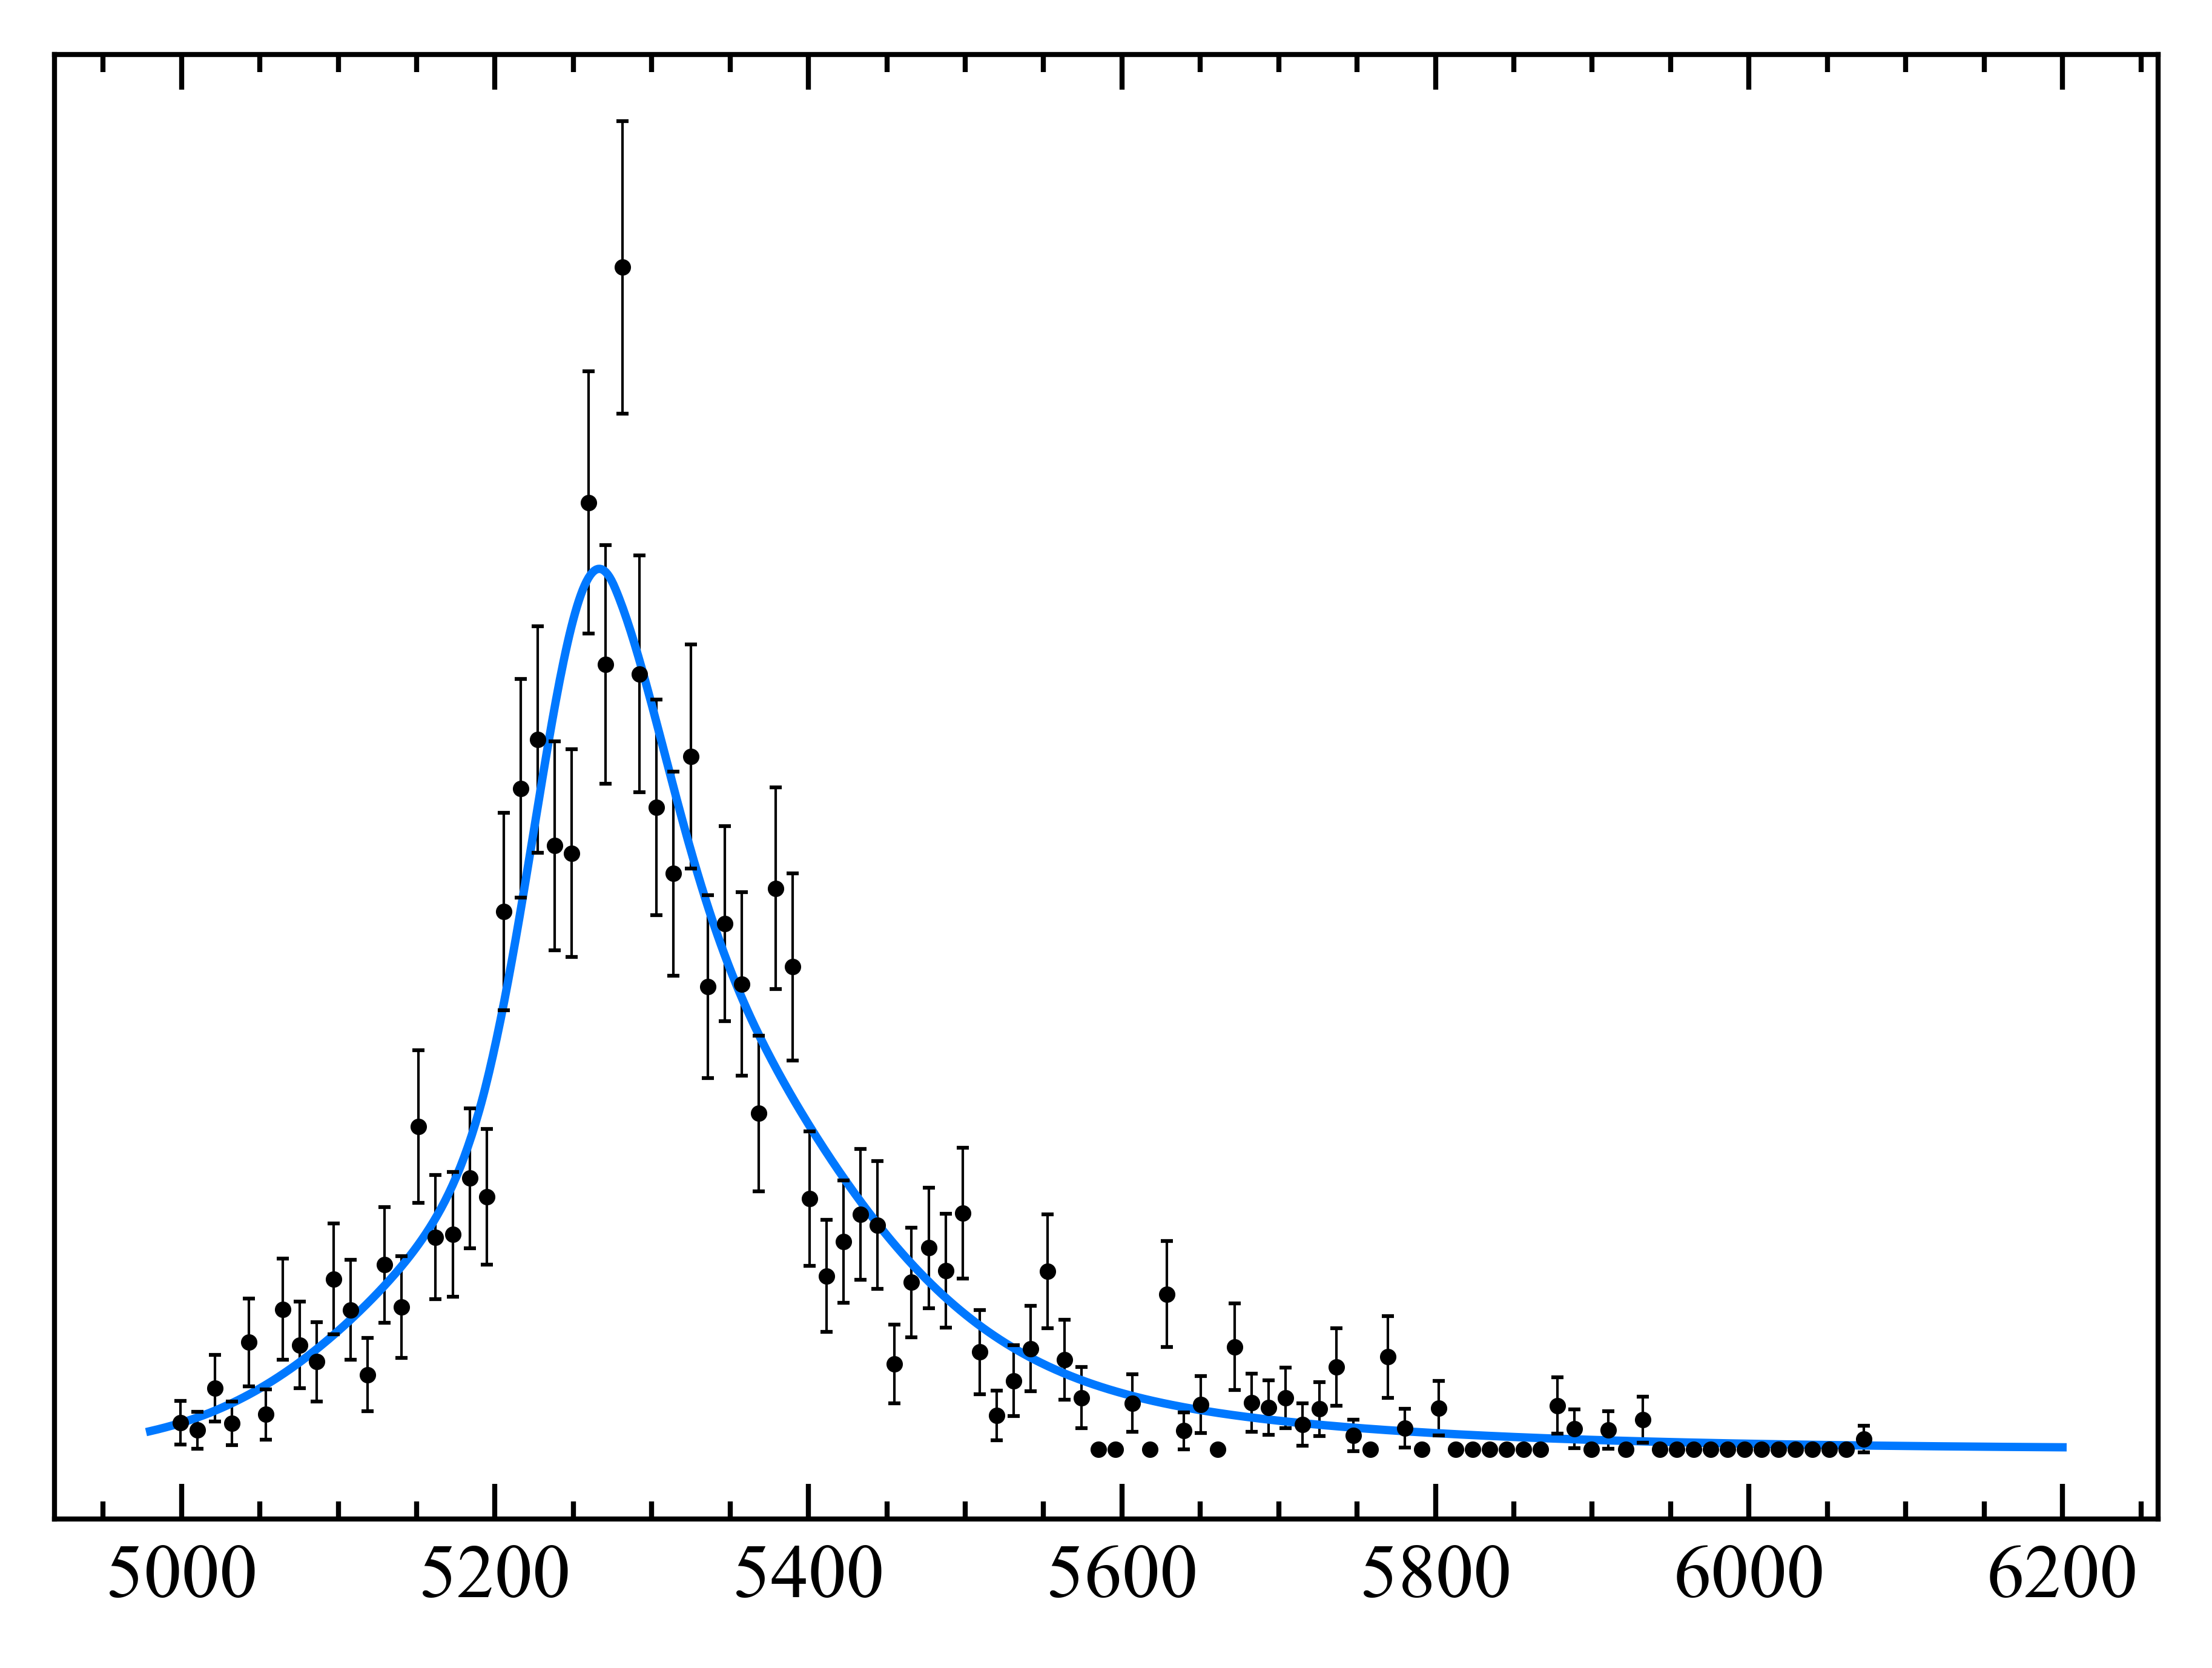

In [21]:
plot_model(sigModel2,B_plus_M2)

In [22]:
sigModelTot = zfit.pdf.SumPDF([sigModel0, sigModel1, sigModel2], [frac0gamma, frac1gamma])



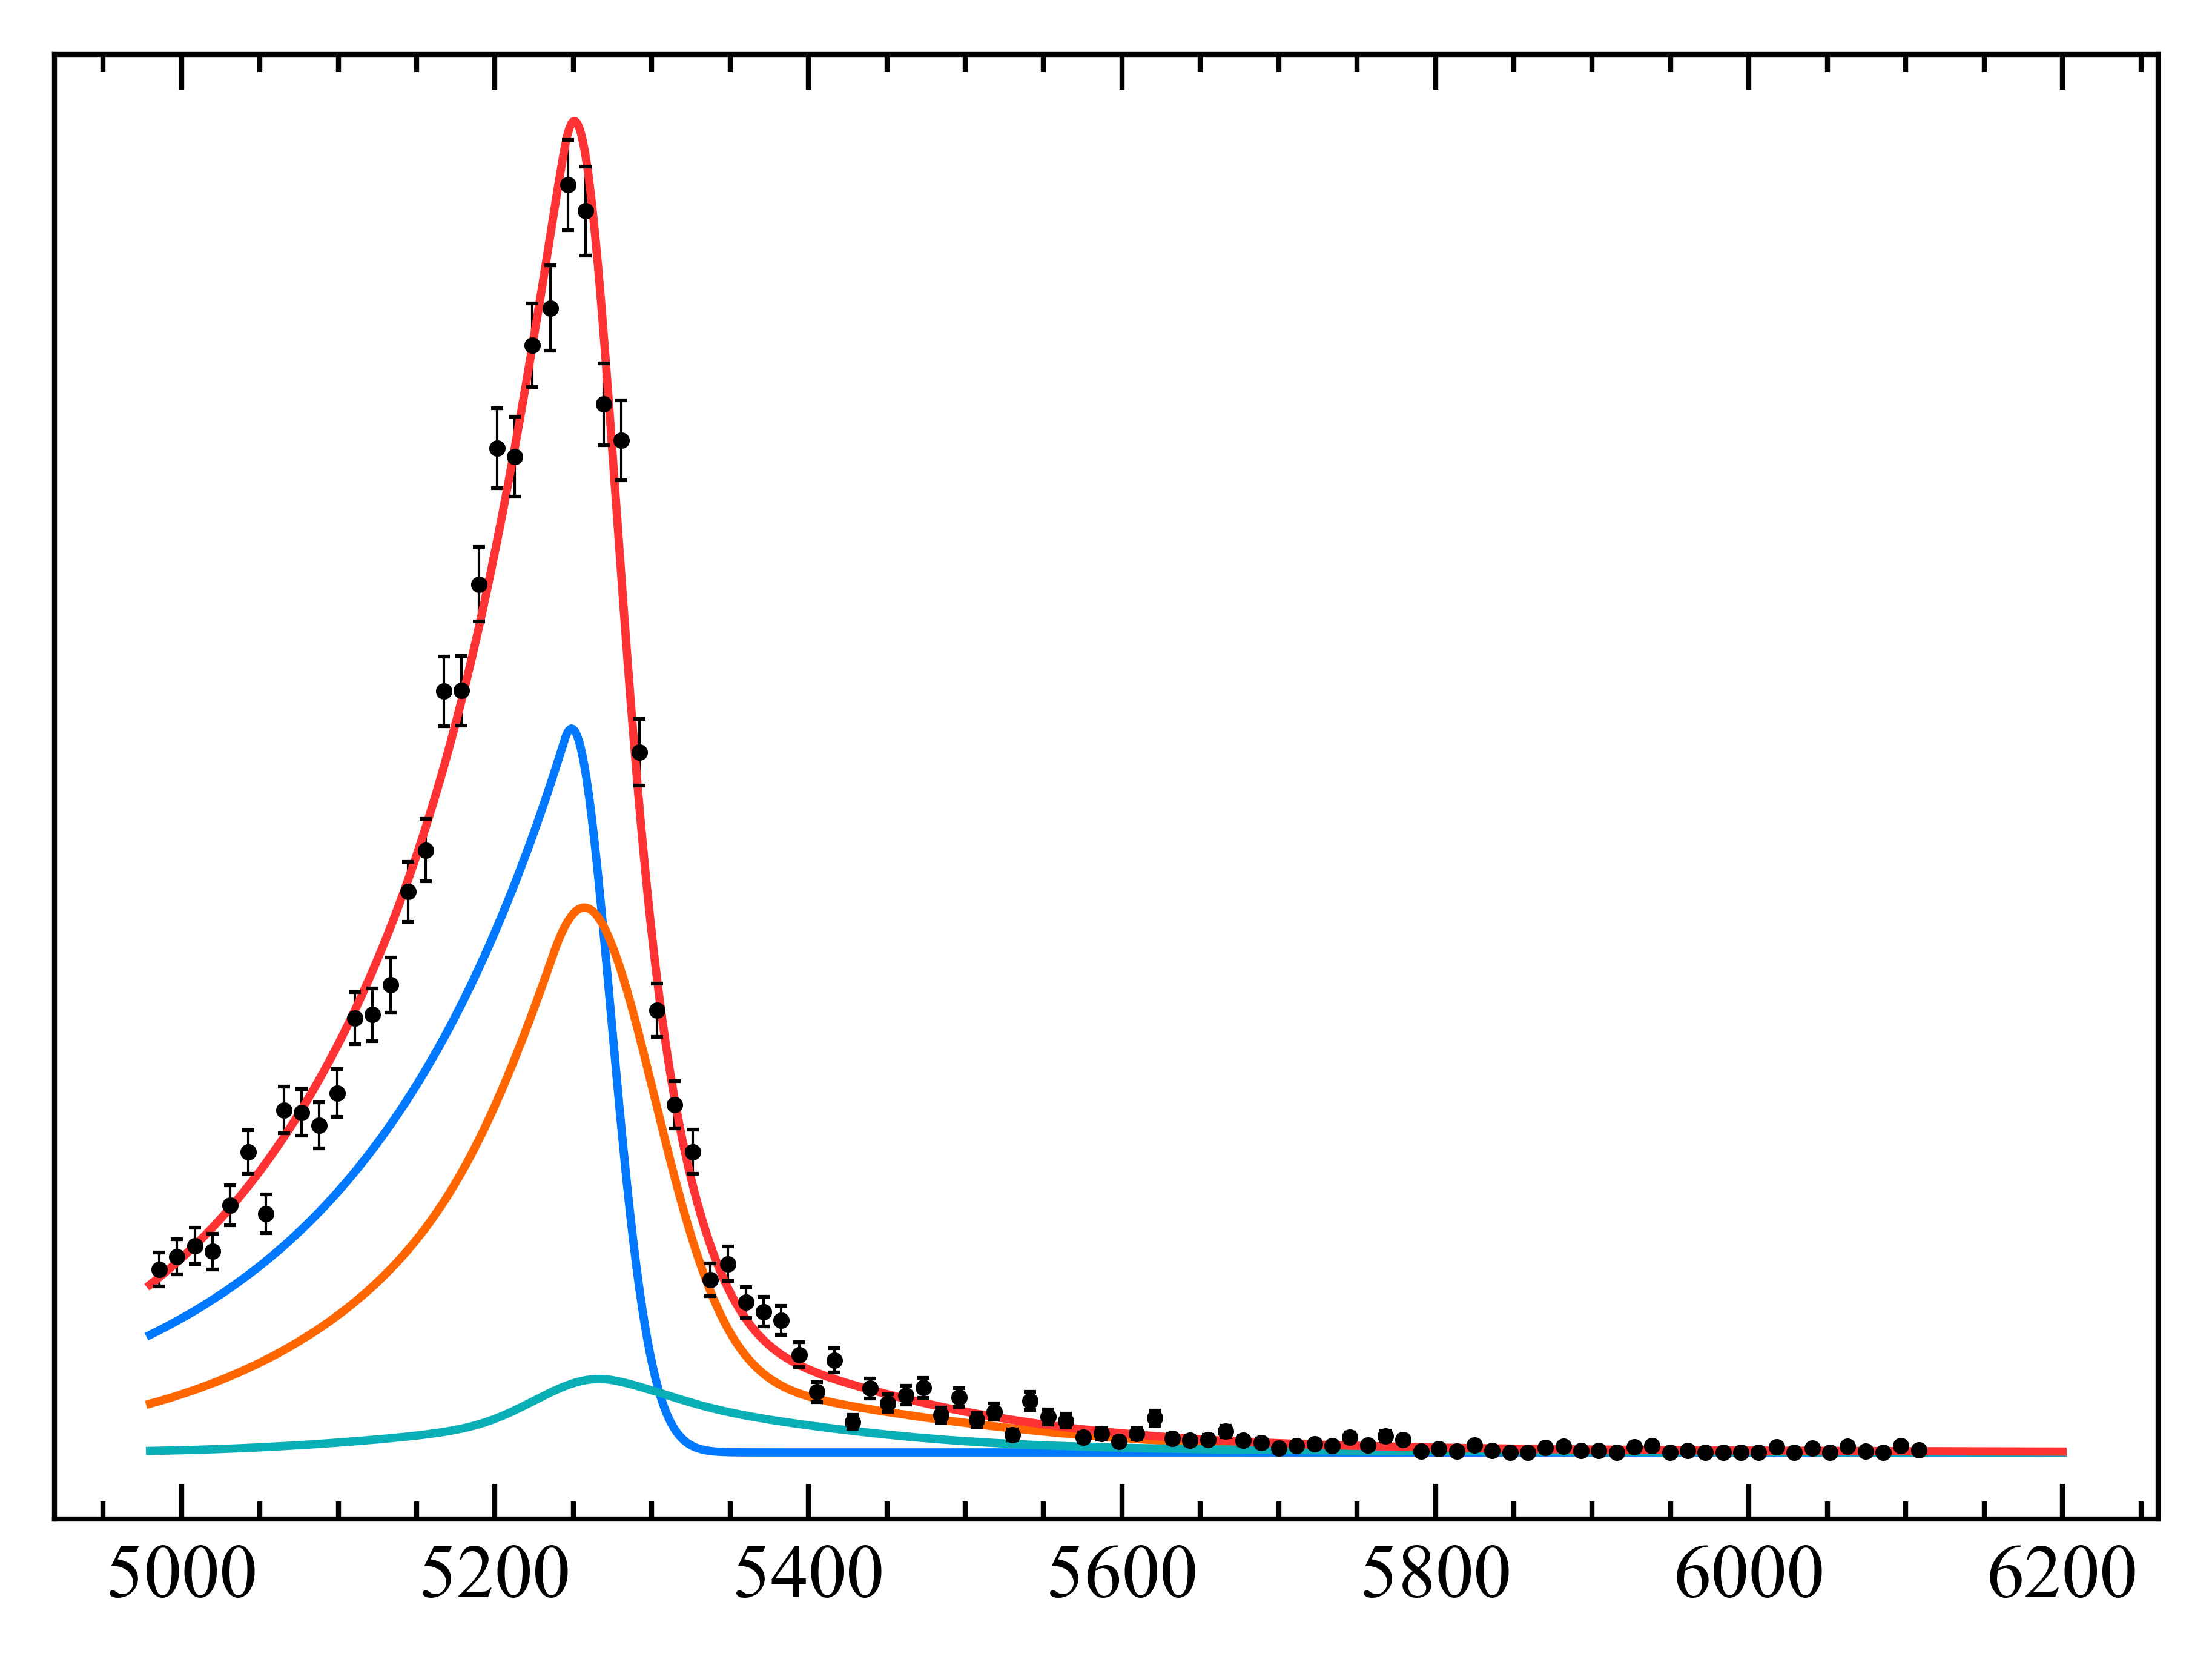

In [23]:
plot_comp_model(sigModelTot, B_plus_M)

In [24]:
tuplePsi2SName='KPsi2S_'+str(year)+'_CommonPresel_HltTOS_bdt.root'
fileMCPsi2S = ur.open(PATH_MC+tuplePsi2SName)
treeMCPsi2S=fileMCPsi2S['DecayTree']

branchesPsi2S=treeMCPsi2S.arrays(library='pd', filter_name=branches)
branchesPsi2S*=1.
dfPsi2S_CommonPresel=branchesPsi2S.query(preselStringNoPid);




[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

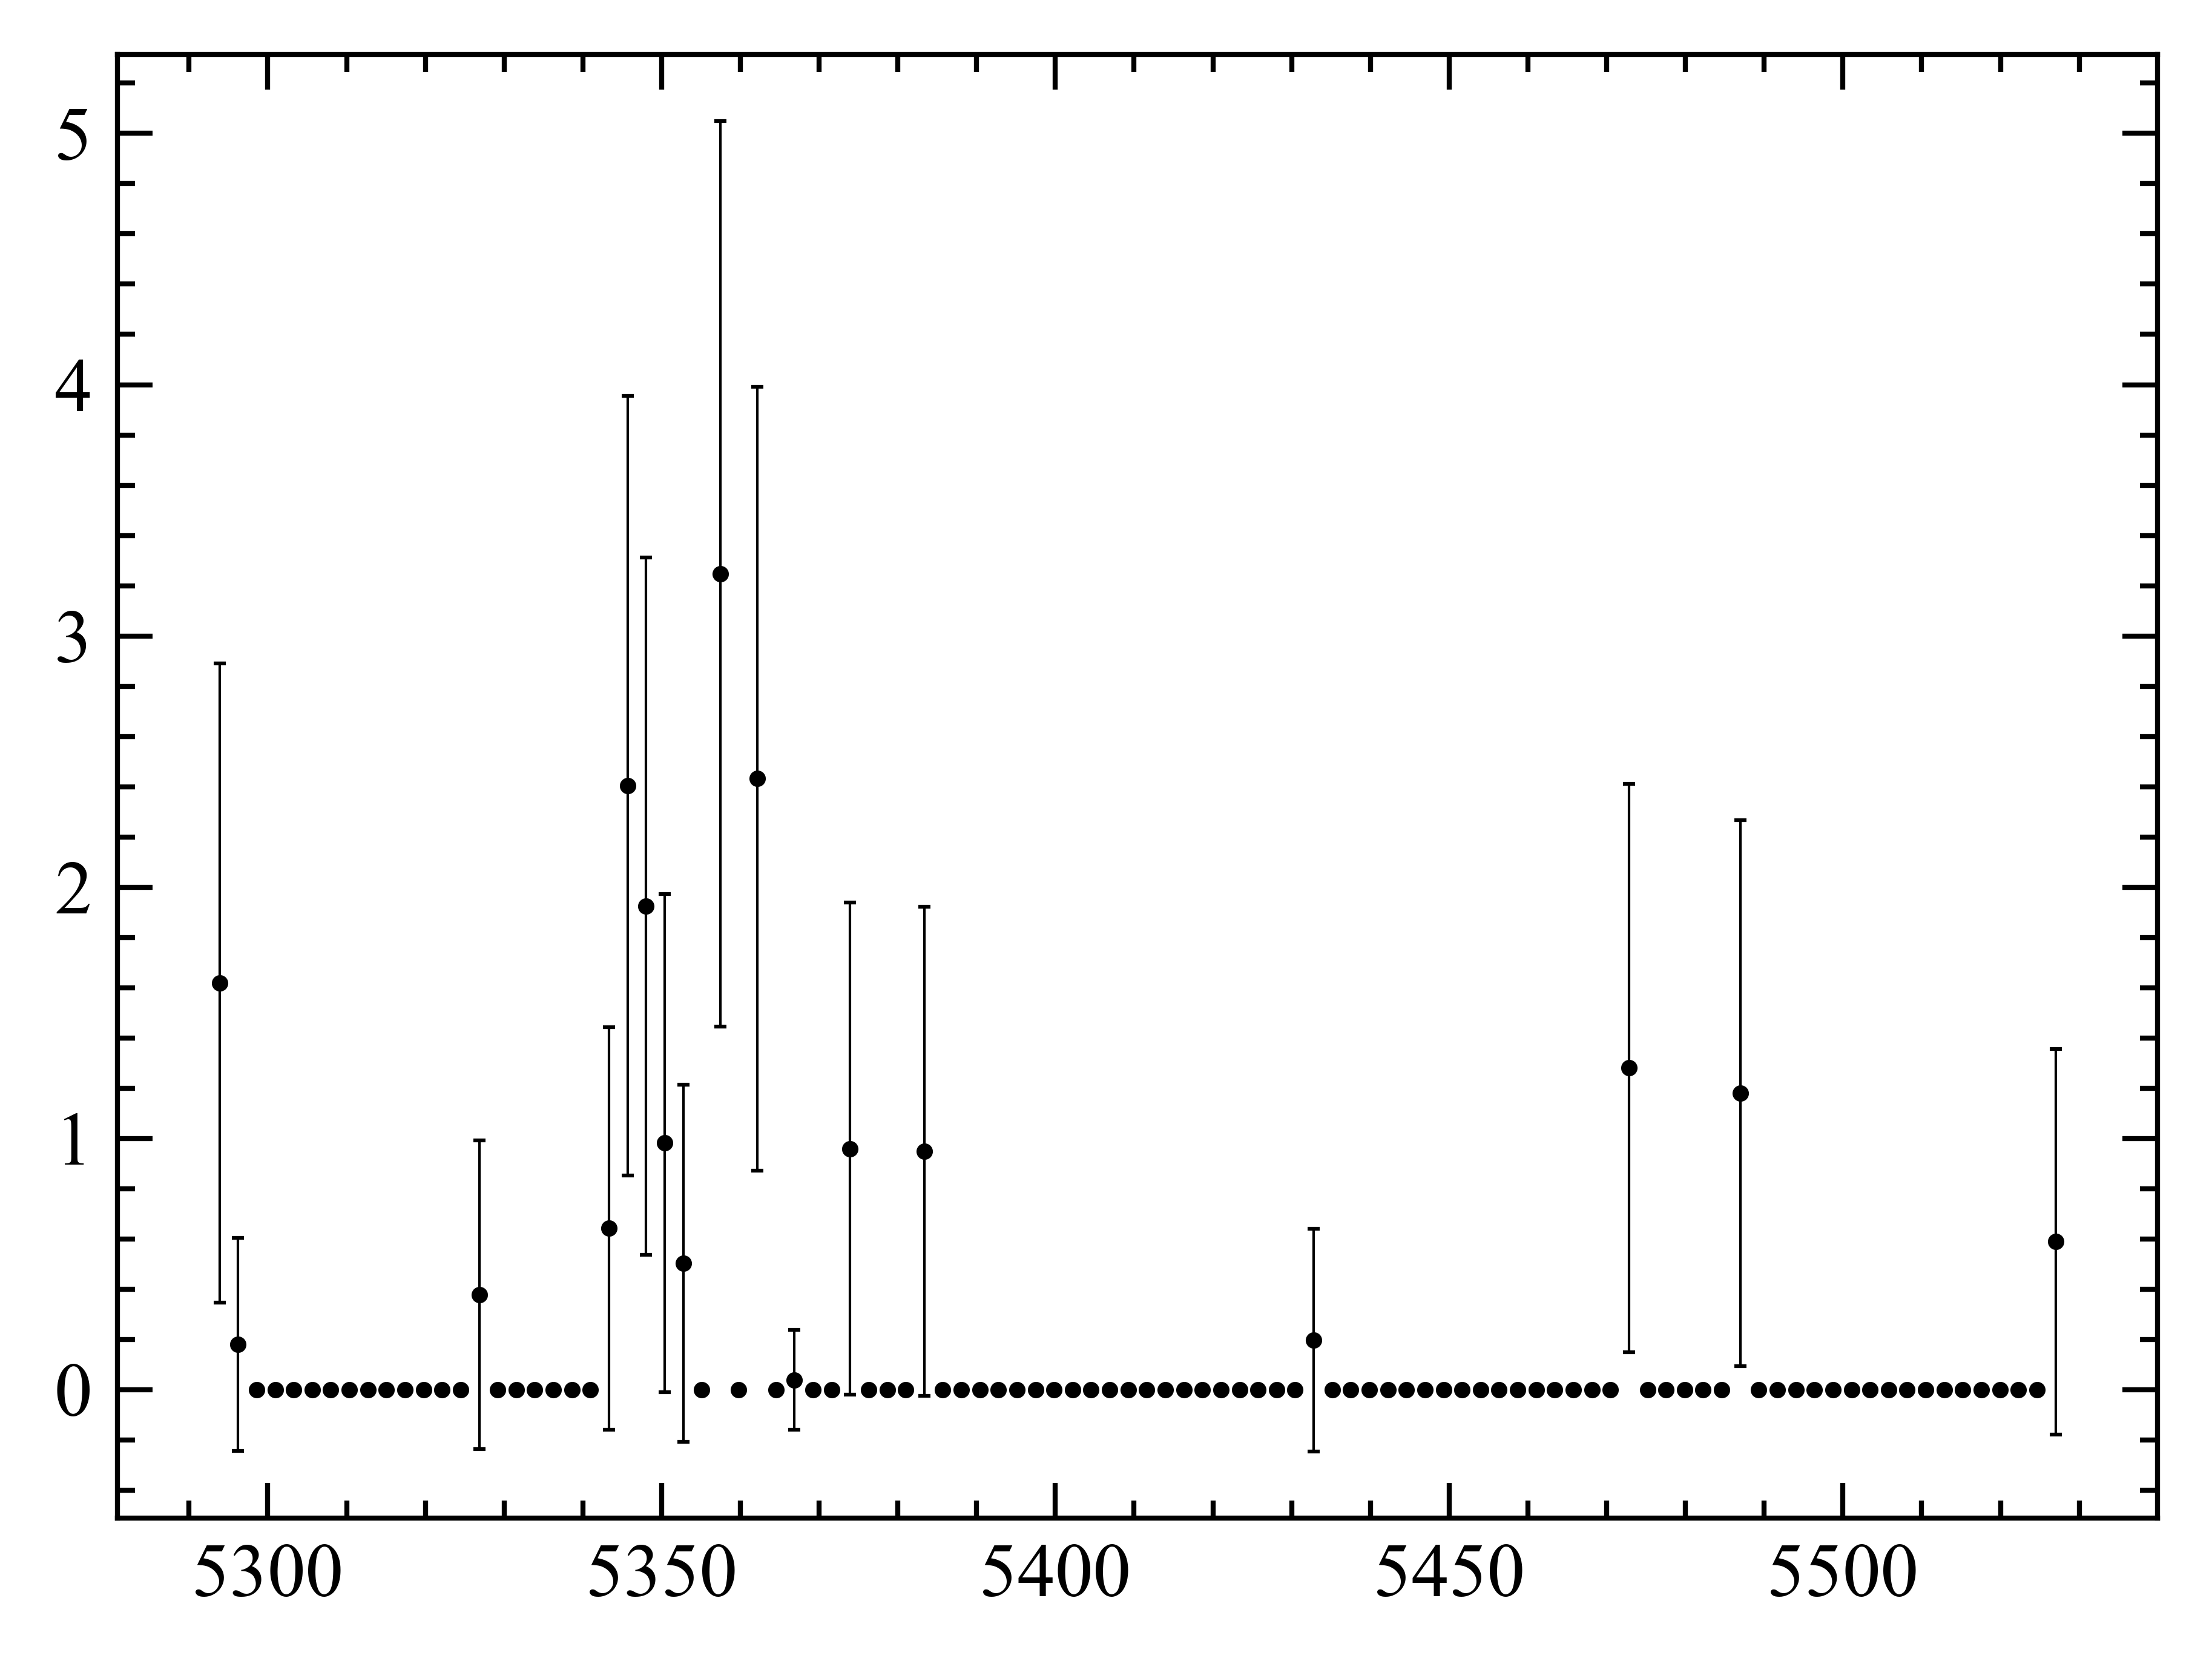

In [25]:
dfPsi2S_trig0 = dfPsi2S_CommonPresel.query("J_psi_1S_TRACK_M*J_psi_1S_TRACK_M > 14e6 and passTrigCat0 and B_plus_M>4980 and B_plus_M<6200")

mplhep.histplot(plt.hist(dfPsi2S_trig0['B_plus_M'], weights=dfPsi2S_trig0['PIDWeight_DLL4']*dfPsi2S_trig0['KinWeight_MUTOS2DNTracks'], bins=100, facecolor="none"), 
                yerr=True, color='black', histtype='errorbar')

In [26]:
tupleMCKstName='Kstee_'+str(year)+'_CommonPresel_HltTOS_bdt.root'
fileMCKst = ur.open(PATH_MC+tupleMCKstName)
treeMCKst=fileMCKst['DecayTree']

branchesMCKst=treeMCKst.arrays(library='pd', filter_name=branches)
branchesMCKst*=1.
dfKst_CommonPresel=branchesMCKst.query(preselStringNoPid);

dfKst_trig0 = dfKst_CommonPresel.query("J_psi_1S_TRACK_M*J_psi_1S_TRACK_M > 14e6 and passTrigCat0 and B_plus_M>4600 and B_plus_M<6200")

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

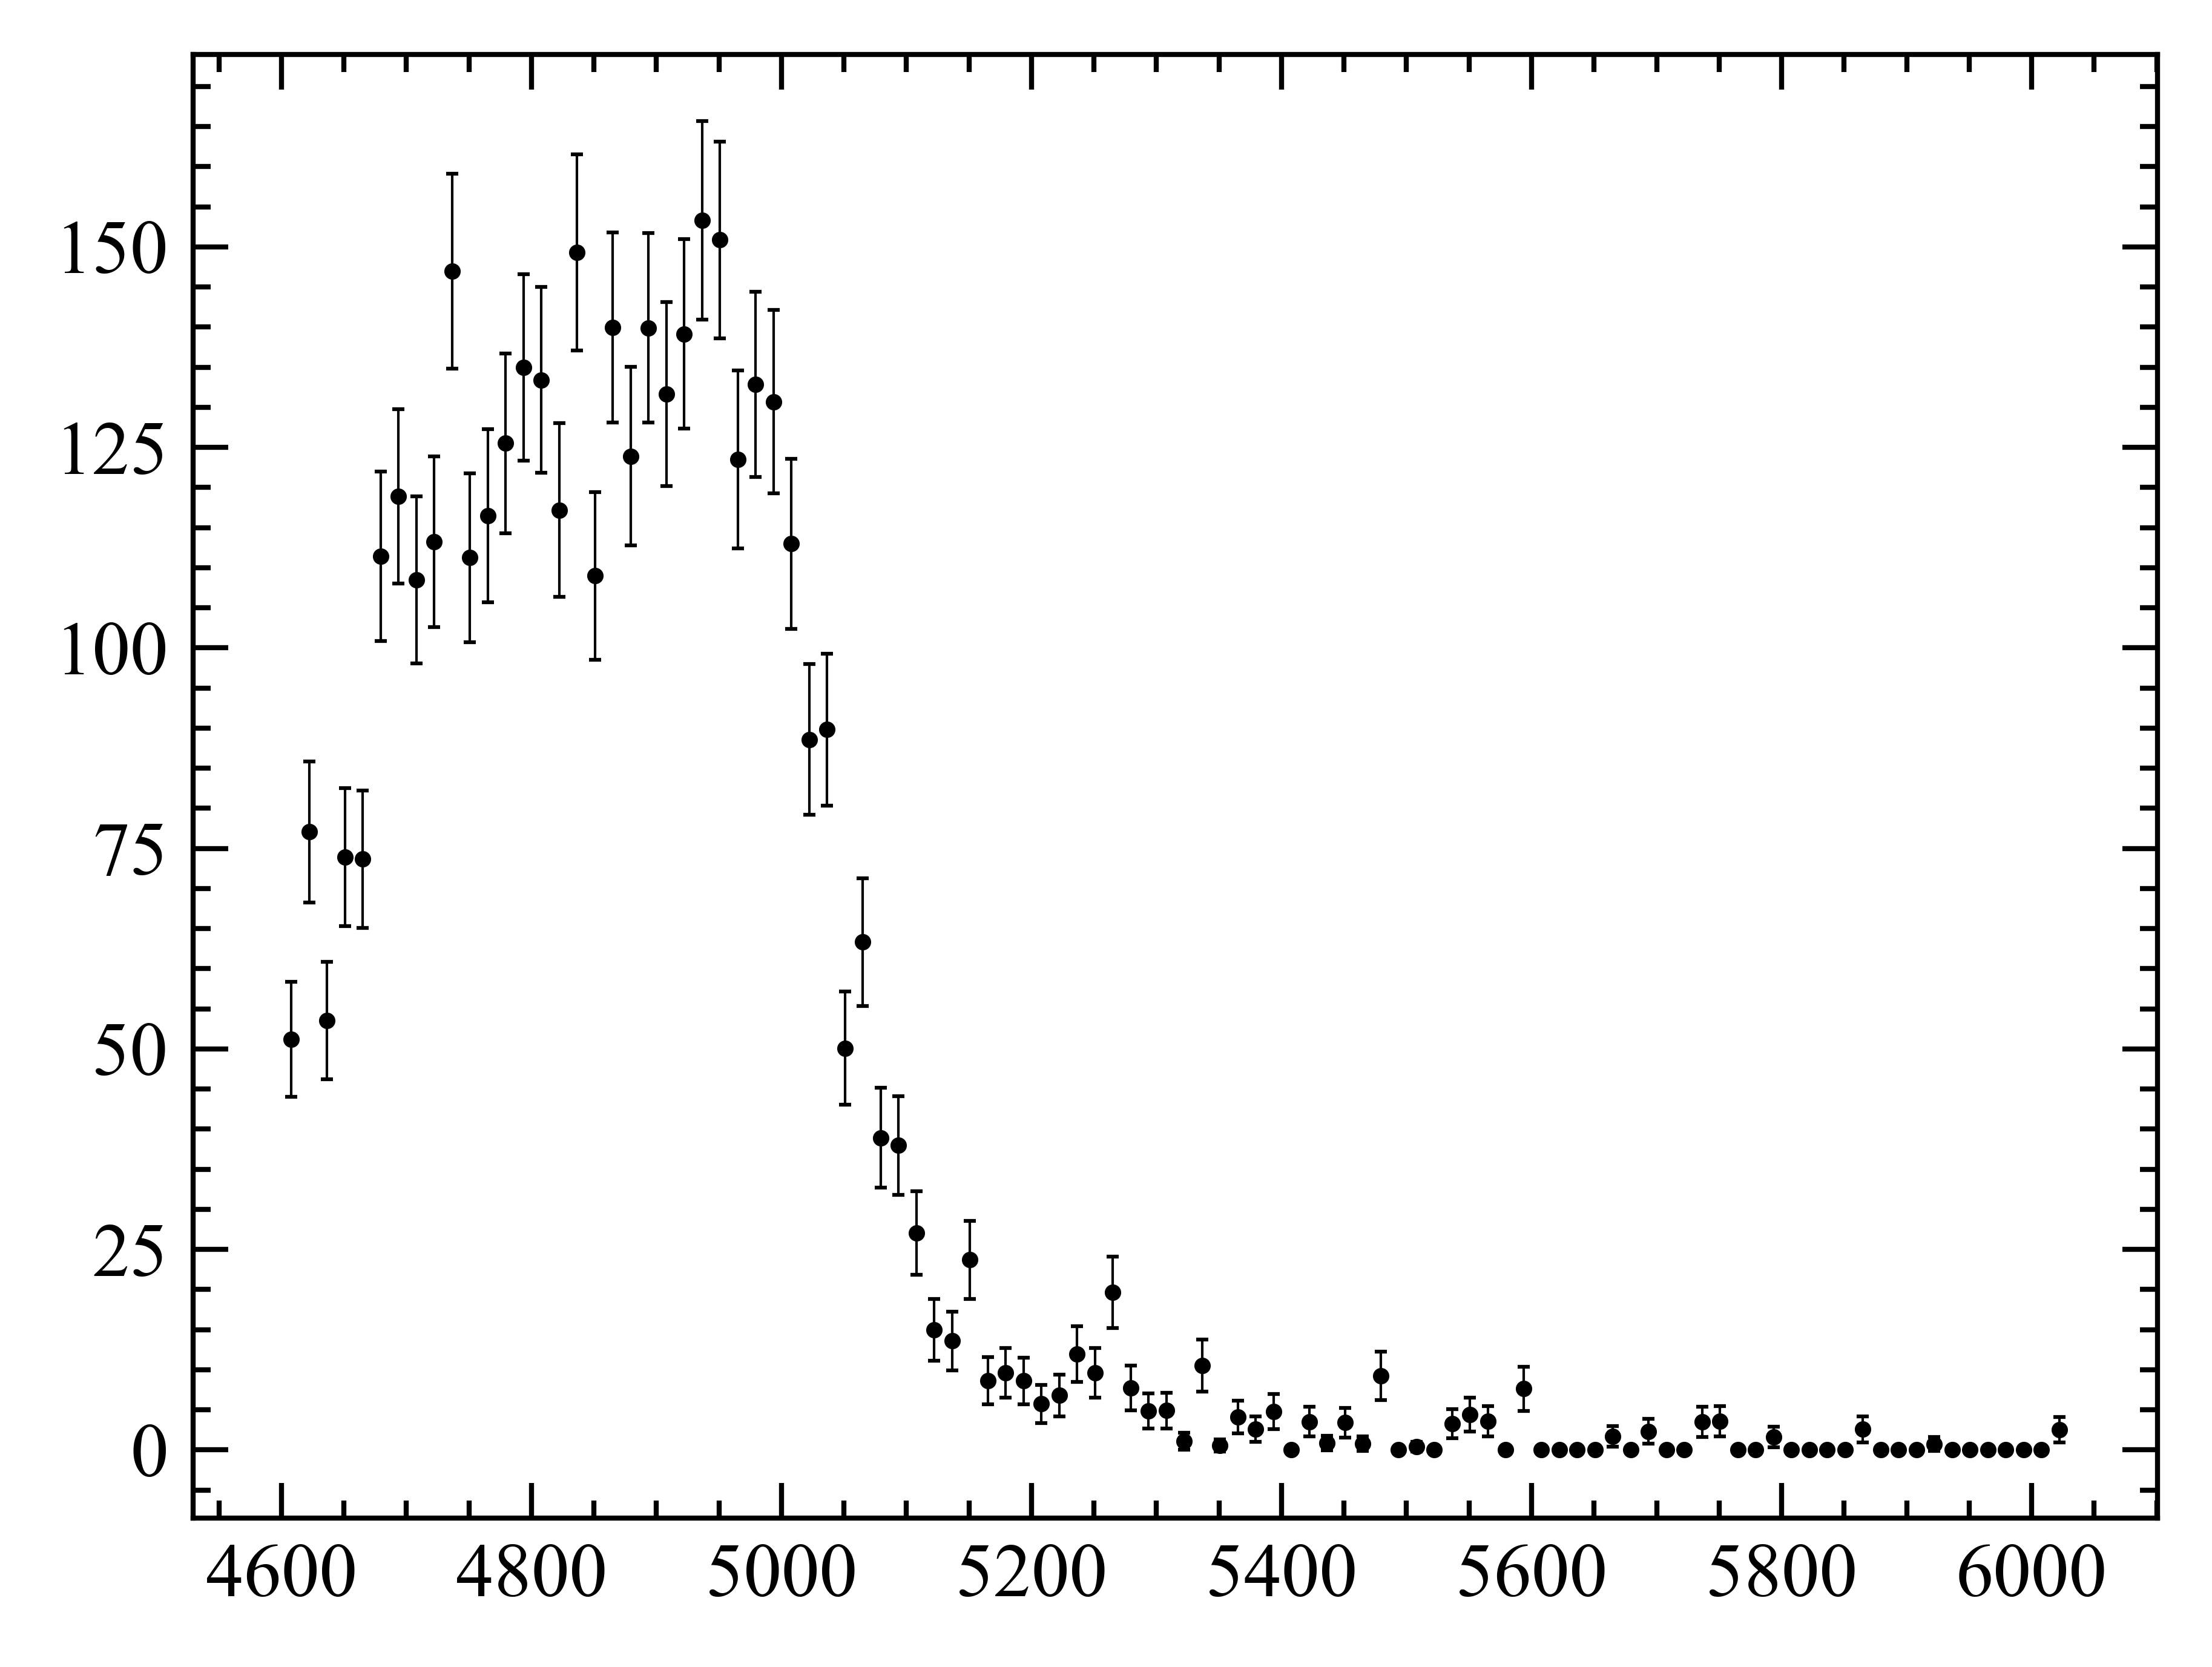

In [27]:

mplhep.histplot(plt.hist(dfKst_trig0['B_plus_M'], weights=dfKst_trig0['PIDWeight_DLL4']*dfKst_trig0['KinWeight_MUTOS2DNTracks'], bins=100, facecolor="none"), 
                yerr=True, color='black', histtype='errorbar')



In [28]:
dfKst_trig0 = dfKst_CommonPresel.query("J_psi_1S_TRACK_M*J_psi_1S_TRACK_M > 14e6 and passTrigCat0 and B_plus_M>4600 and B_plus_M<6200")
obs_extended = zfit.Space('B_plus_M', (4600, 6200))


B_plus_M_partreco = zfit.Data.from_numpy(obs=obs_extended, weights=dfKst_trig0['PIDWeight_DLL4']*dfKst_trig0['KinWeight_MUTOS2DNTracks'], array=dfKst_trig0['B_plus_M'].to_numpy())
part_reco = zfit.pdf.GaussianKDE1DimV1(obs=obs, data=B_plus_M_partreco, bandwidth='adaptive')




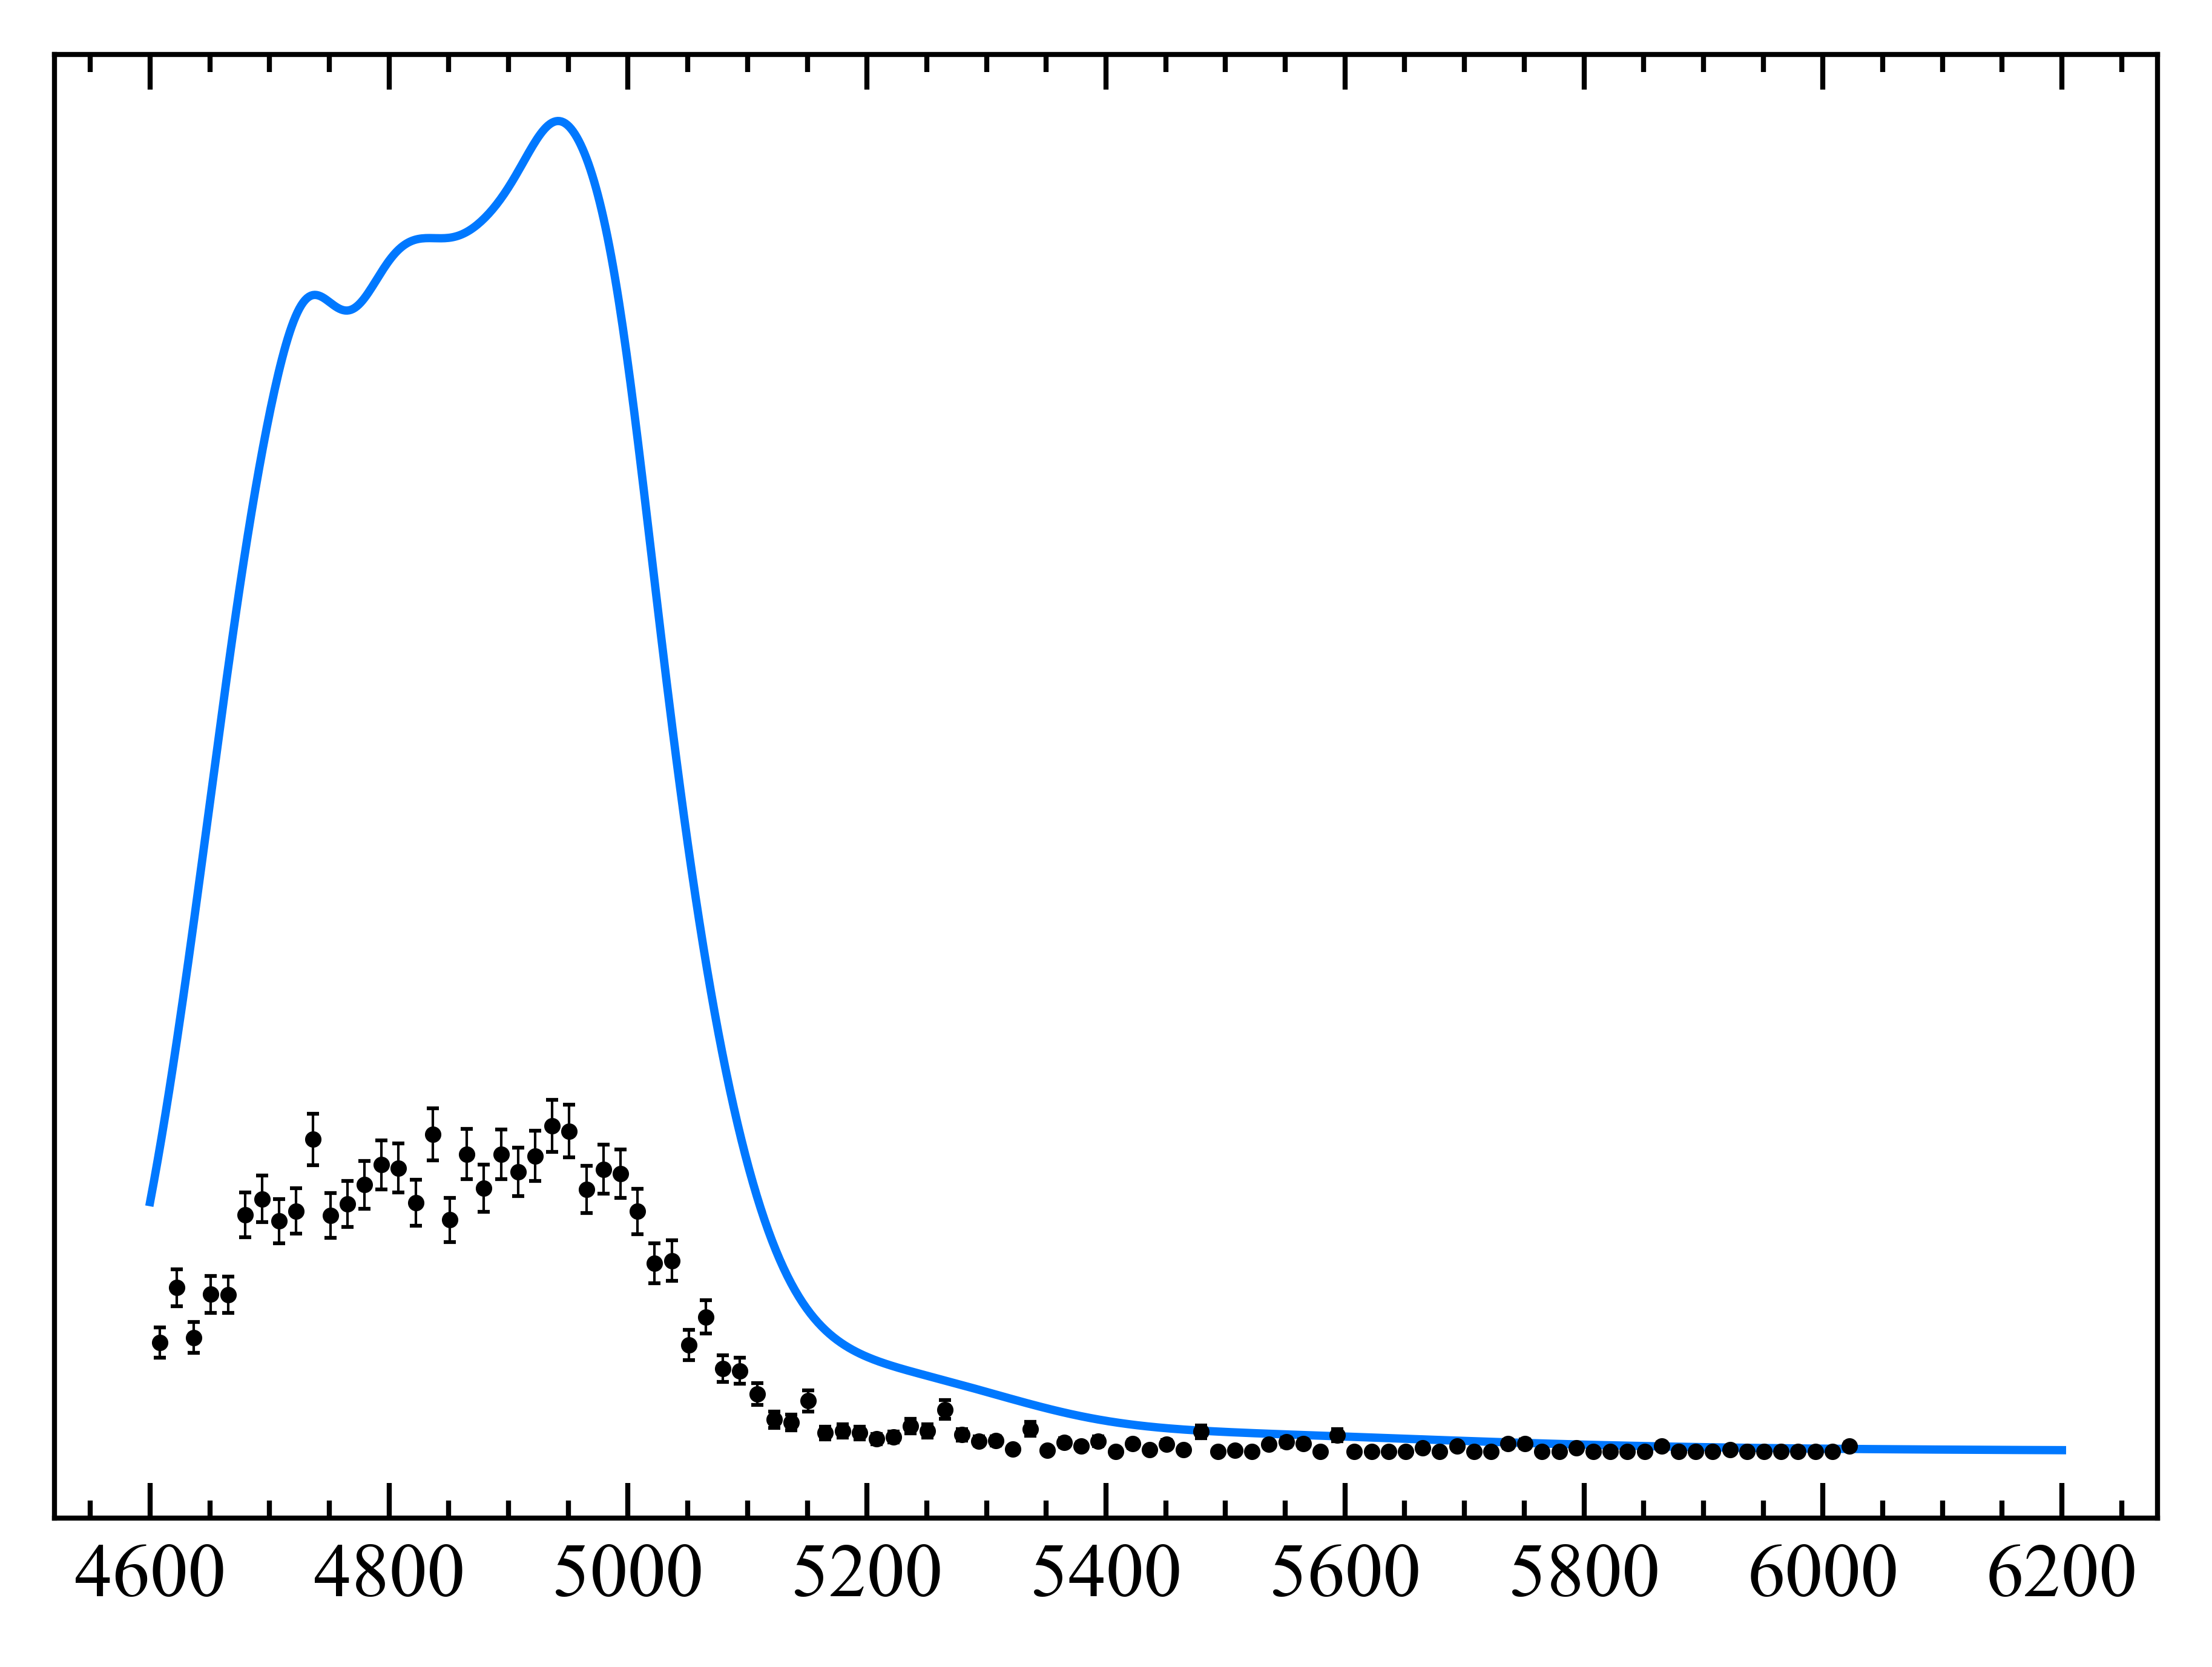

In [29]:
plot_model(part_reco, B_plus_M_partreco)

In [30]:
tupleDataName='B2Kee_'+str(year)+'_CommonPresel_HltTOS_bdt.root'
fileData = ur.open(PATH_Data+tupleDataName)
treeData=fileData['DecayTree']

    
branchesData=treeData.arrays(library='pd', filter_name=branches)


In [31]:
branchesData*=1.
dfData_CommonPresel=branchesData.query(preselString);



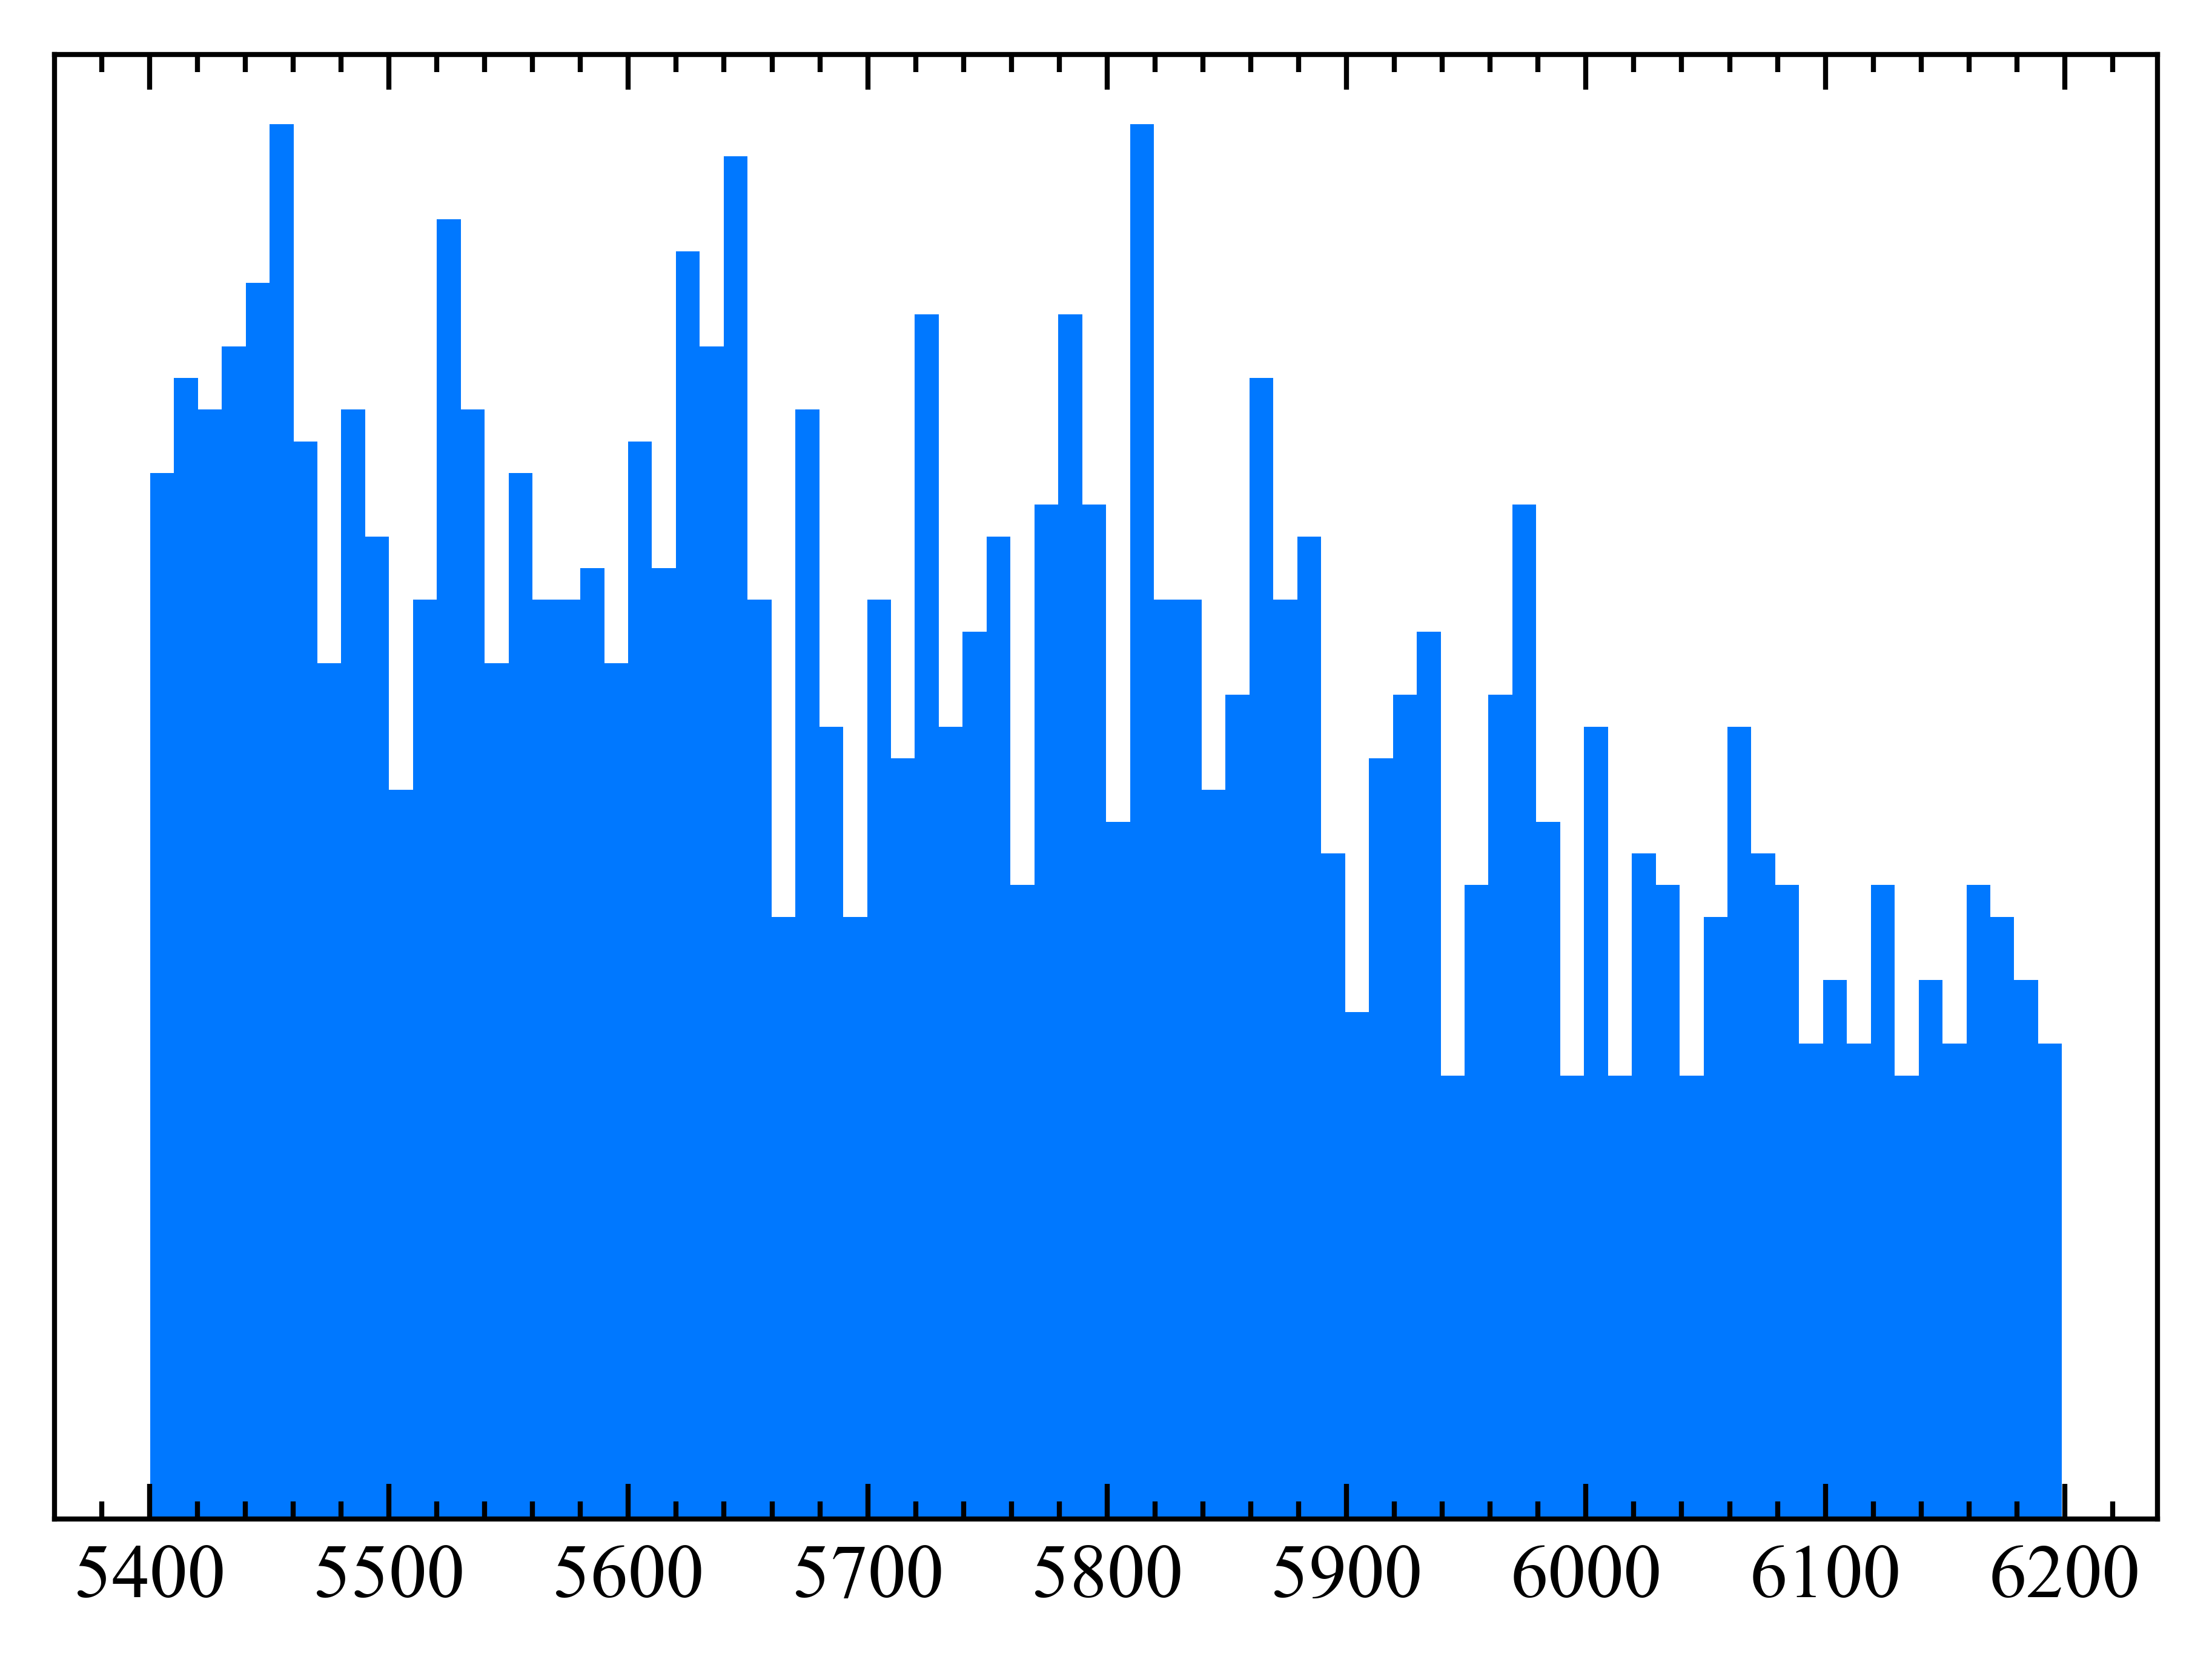

In [32]:
dfData_trig0 = dfData_CommonPresel.query("J_psi_1S_TRACK_M*J_psi_1S_TRACK_M > 14e6 and passTrigCat0 and (B_plus_M>5400 and B_plus_M<6200)")
plt.hist(dfData_trig0['B_plus_M'],bins=80)[0];
frame = pylab.gca()
frame.axes.get_yaxis().set_ticks([])
pylab.show()

In [33]:
obs = zfit.Space('B_plus_M', (4980, 6200))
obs_right_sideband = zfit.Space('B_plus_M', (5400, 6200))
obs_left_sideband = zfit.Space('B_plus_M',(4980, 5100))

#obs_tot_sideband = obs_l_sideband+obs_left_sideband
#B_plus_M_data = zfit.Data.from_numpy(obs=obs, array=dfData_trig0['B_plus_M'].to_numpy())
B_plus_M_data = zfit.Data.from_numpy(obs=obs, array=dfData_trig0['B_plus_M'].to_numpy())


In [34]:
lam = zfit.Parameter('lambda_21', -1e-3, -0.1, 0.001)
comb_bkg = zfit.pdf.Exponential(lam, obs=obs)


comb_bkg_yield = zfit.Parameter('comb_bkg_yield_21', 2000, 0, 10000, step_size=0.1)
comb_bkg_ext = comb_bkg.create_extended(comb_bkg_yield)
#

In [35]:
minimizer = zfit.minimize.Minuit(use_minuit_grad=True, minimize_strategy=2, verbosity=6)

In [36]:
with comb_bkg_ext.set_norm_range(obs_right_sideband):
    nll_sidebands = zfit.loss.ExtendedUnbinnedNLL(comb_bkg_ext, B_plus_M_data)
    minimizer.minimize(nll_sidebands)

/disk/lhcb_data/davide/miniconda3/envs/zfit_env/lib/python3.8/site-packages/zfit/core/loss.py:154: AdvancedFeatureWarning: Either you're using an advanced feature OR causing unwanted behavior. To turn this warning off, use `zfit.settings.advanced_warnings['inconsistent_fitrange']` = False`  or 'all' (use with care) with `zfit.settings.advanced_warnings['all'] = False
PDFs [<zfit.Exponential  params=[lambda_21] dtype=float64>0] as well as `data` [<zfit.core.data.Data object at 0x7f8d7700bd30>] have different ranges [(<zfit Space obs=('B_plus_M',), axes=(0,), limits=(array([[5400.]]), array([[6200.]]))>, <zfit Space obs=('B_plus_M',), axes=(0,), limits=(array([[4980.]]), array([[6200.]]))>)] they are defined in. The data range will cut the data while the norm range defines the normalization.
  warn_advanced_feature(f"PDFs {non_consistent['model']} as "
/disk/lhcb_data/davide/miniconda3/envs/zfit_env/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating a

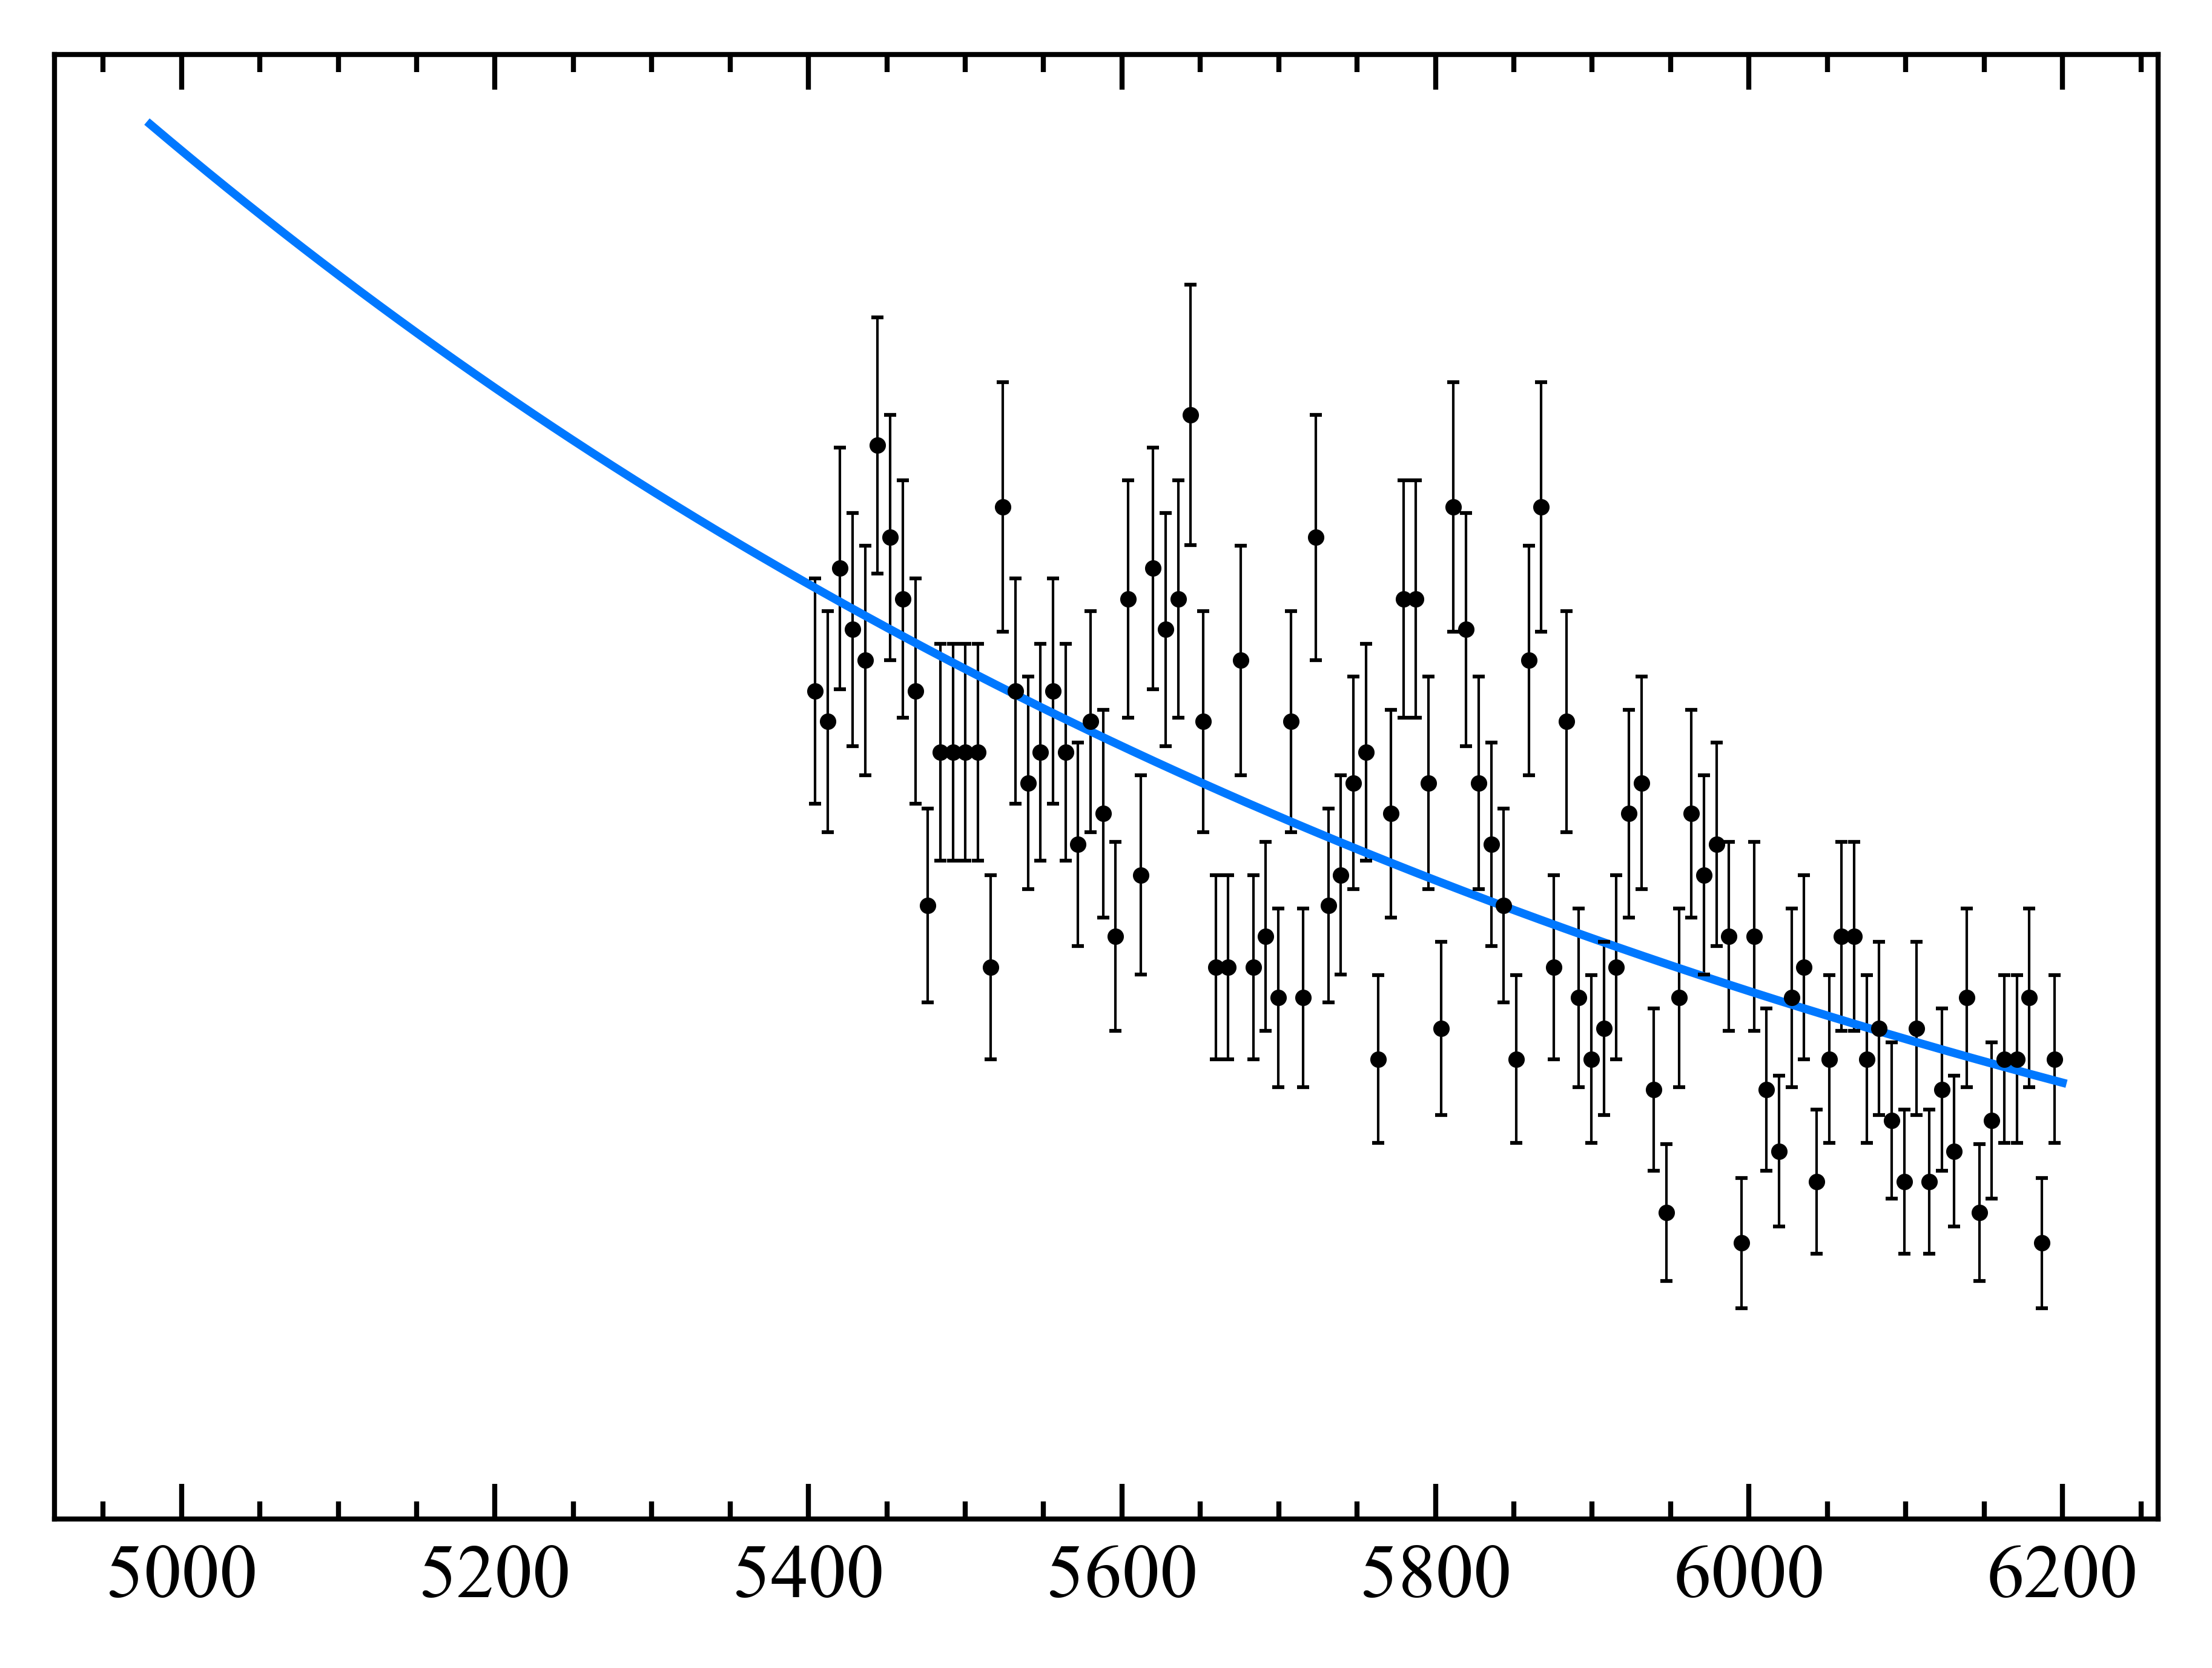

In [37]:
plot_model_combi(comb_bkg_ext,B_plus_M_data)

In [38]:
est_comb=(comb_bkg_yield/comb_bkg_ext.integrate(limits=(5400,6200))).numpy()[0]

In [39]:
lam.floating = False


In [40]:
lam.value

<bound method Parameter.value of <zfit.Parameter 'lambda_21' floating=False value=-0.0009522>>

In [41]:
PATH_truthed='/disk/lhcb_data/davide/RKHighq2/tuples/'+str(year)+'/MC/KeeTuples/truthed/'
BFKstee=1.166e-6
BFKee=5.657e-7
cascadecuts = getCascadeVetoes().replace('&&','and').replace('||','or')
preselStringNoPidAndq2=preselStringNoPid+" and J_psi_1S_TRACK_M*J_psi_1S_TRACK_M>14e6 and (B_plus_M>4980 and B_plus_M<6200)"
trigString="passTrigCat0==1"

In [42]:
tupleMCKstName_truthed='Kstee_'+str(year)+'_truthed_bdt.root'
fileMCKst_truthed = ur.open(PATH_truthed+tupleMCKstName_truthed)
treeMCKst_truthed = fileMCKst_truthed['DecayTree']

branchesMCKst_truthed=treeMCKst_truthed.arrays(library='pd', filter_name=branches)
branchesMCKst_truthed*=1.
totTruthedKst=len(branchesMCKst_truthed['B_plus_M'])


#preselStringNoPidAndq2=preselStringNoPid+" and J_psi_1S_TRACK_M*J_psi_1S_M>1.1e6 and J_psi_1S_M*J_psi_1S_M<6e6 and "+cascadecuts
MCKst_presel=branchesMCKst_truthed.query(preselStringNoPidAndq2)
totPreselKst=len(MCKst_presel)




MCKst_trig0=MCKst_presel.query(trigString)
totTrig0Kst =len(MCKst_trig0)

effPIDKst=MCKst_trig0['PIDWeight_DLL4'].sum()/totTrig0Kst
effTrig0Kst=totTrig0Kst/totTruthedKst

effKstee=effPIDKst*totTrig0Kst/totTruthedKst

In [43]:
tupleMCName_truthed='Kee_'+str(year)+'_truthed.root'
fileMC_truthed = ur.open("/disk/lhcb_data/davide/RKHighq2//tuples/2018/MC/KeeTuples/truthed/Kee_2018_truthed_bdt.root")
treeMC_truthed = fileMC_truthed['DecayTree']

branchesMC_truthed=treeMC_truthed.arrays(library='pd', filter_name=branches)
branchesMC_truthed*=1.
totTruthedSig=len(branchesMC_truthed['B_plus_M'])

MC_presel=branchesMC_truthed.query(preselStringNoPidAndq2)
totPreselSig=len(MC_presel)


MC_trig0Sig=MC_presel.query(trigString)
totTrig0Sig =len(MC_trig0Sig)

effPIDSig=MC_trig0Sig['PIDWeight_DLL4'].sum()/totTrig0Sig
effTrig0Sig=totTrig0Sig/totTruthedSig
effSig=effPIDSig*totTrig0Sig/totTruthedSig

In [44]:
NKee_bf_Run1 = (72e-6*3e15*0.4*BFKee)
NKee_bf_Run2 = (144e-6*9e15*0.4*BFKee)

In [45]:
NKee_bf=NKee_bf_Run1+NKee_bf_Run2

In [46]:
effStrip=0.13846

In [47]:
NKee=(NKee_bf_Run1*effStrip*0.66*effTrig0Kst*effPIDKst)+(NKee_bf_Run2*effStrip*effTrig0Sig*effPIDSig)

In [48]:
NKstee=NKee*(BFKstee*effKstee)/(BFKee*effSig);

In [49]:
Ncomb=comb_bkg_yield.numpy()

In [50]:
Ntot = NKee+NKstee+Ncomb

In [51]:
fracKee=NKee/Ntot
fracKst=NKstee/Ntot

In [52]:
sig_frac = zfit.Parameter('sig_frac_def_19', fracKee, 0, 1)
prc_bkg_frac = zfit.Parameter('prc_bkg_frac_def_19', fracKst, 0, 1)

In [53]:

#comb_bkg.set_norm_range([4980,6200])
modelTot = zfit.pdf.SumPDF([sigModelTot, part_reco, comb_bkg], [sig_frac, prc_bkg_frac])
data = modelTot.sample(n=10000)

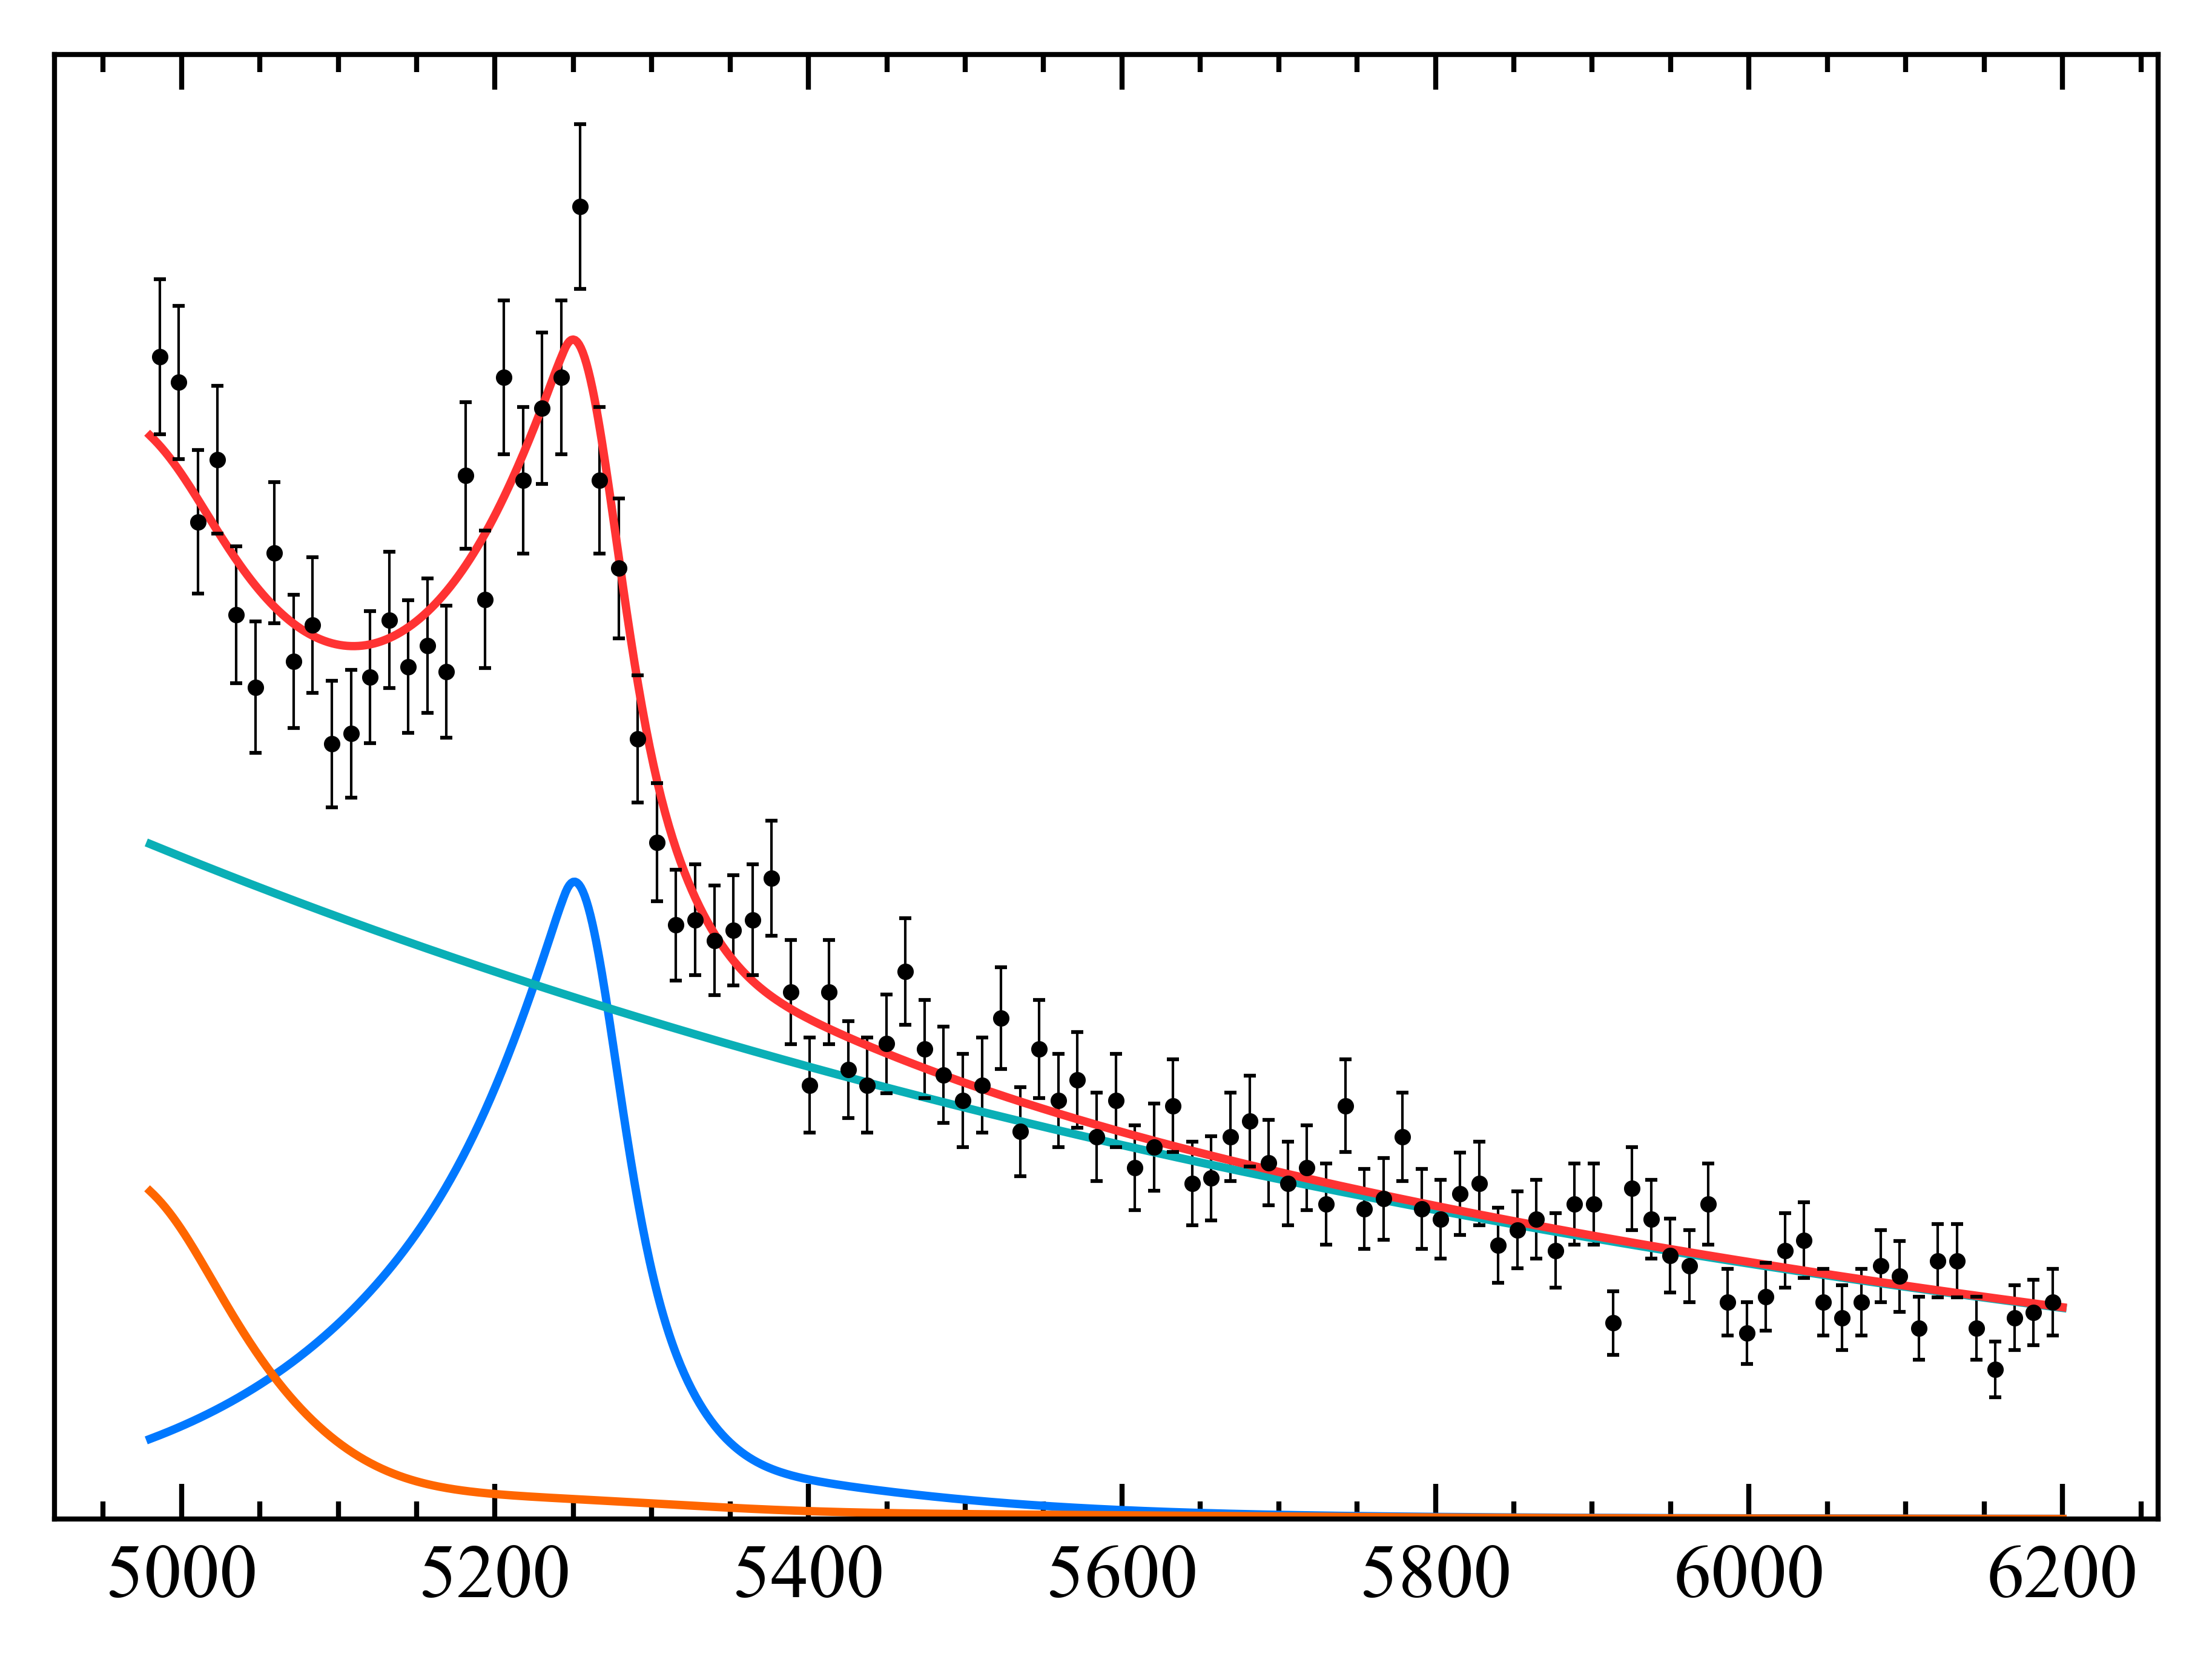

In [54]:
plot_comp_model(modelTot,data)

In [55]:
a

NameError: name 'a' is not defined